In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels
from scipy import stats
import statsmodels.api as sm
from scipy.stats import shapiro
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE

from sklearn.linear_model import Lasso, Ridge, ElasticNet, SGDRegressor, LinearRegression
from sklearn.model_selection import KFold, LeaveOneOut, GridSearchCV, cross_val_score, train_test_split

%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

ModuleNotFoundError: No module named 'statsmodels'

In [3]:
#Import dataset
df=pd.read_csv("co2_emission.csv")

In [4]:
df

make        model   vehicle_class  engine_size  cylinders transmission  \
0     ACURA          ILX         COMPACT          2.0          4           AS   
1     ACURA          ILX         COMPACT          2.4          4            M   
2     ACURA   ILX HYBRID         COMPACT          1.5          4           AV   
3     ACURA      MDX 4WD     SUV - SMALL          3.5          6           AS   
4     ACURA      RDX AWD     SUV - SMALL          3.5          6           AS   
...     ...          ...             ...          ...        ...          ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL          2.0          4           AS   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL          2.0          4           AS   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL          2.0          4           AS   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD          2.0          4           AS   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD          2.0          4           AS   

     fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0            Z                    9.9                   6.7   
1            Z                   11.2                   7.7   
2            Z                    6.0                   5.8   
3            Z                   12.7                   9.1   
4            Z                   12.1                   8.7   
...        ...                    ...                   ...   
7380         Z                   10.7                   7.7   
7381         Z                   11.2                   8.3   
7382         Z                   11.7                   8.6   
7383         Z                   11.2                   8.3   
7384         Z                   12.2                   8.7   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
0                                8.5                          33   
1                                9.6                          29   
2                                5.9                          48   
3                               11.1                          25   
4                               10.6                          27   
...                              ...                         ...   
7380                             9.4                          30   
7381                             9.9                          29   
7382                            10.3                          27   
7383                             9.9                          29   
7384                            10.7                          26   

      co2_emissions  
0               196  
1               221  
2               136  
3               255  
4               244  
...             ...  
7380            219  
7381            232  
7382            240  
7383            232  
7384            248  

[7385 rows x 12 columns]

In [6]:
df.shape

(7385, 12)

**1.In this dataset 7385 rows and 12 columns are present**

In [7]:
#To display the first few rows of the dataset.
df.head()

make       model vehicle_class  engine_size  cylinders transmission  \
0  ACURA         ILX       COMPACT          2.0          4           AS   
1  ACURA         ILX       COMPACT          2.4          4            M   
2  ACURA  ILX HYBRID       COMPACT          1.5          4           AV   
3  ACURA     MDX 4WD   SUV - SMALL          3.5          6           AS   
4  ACURA     RDX AWD   SUV - SMALL          3.5          6           AS   

  fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0         Z                    9.9                   6.7   
1         Z                   11.2                   7.7   
2         Z                    6.0                   5.8   
3         Z                   12.7                   9.1   
4         Z                   12.1                   8.7   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  
0                             8.5                          33            196  
1                             9.6                          29            221  
2                             5.9                          48            136  
3                            11.1                          25            255  
4                            10.6                          27            244

In [8]:
#Data Structure
print(type(df))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(7385, 12)


In [9]:
#data types
df.dtypes # check data types of all variables

make                               object
model                              object
vehicle_class                      object
engine_size                       float64
cylinders                           int64
transmission                       object
fuel_type                          object
fuel_consumption_city             float64
fuel_consumption_hwy              float64
fuel_consumption_comb(l/100km)    float64
fuel_consumption_comb(mpg)          int64
co2_emissions                       int64
dtype: object

In [10]:
#To check data types and missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

**1. 5 of the 12 column are of object datatype, 3 integer and 4 are float type.**

**2. The columns engine_size, cylinders, fuel_consumption_city, Fuel Consumption Hwy, Fuel Consumption Comb (l/100 km), Fuel Consumption Comb (mpg) and CO2 Emissions are numerical and continuous in nature.**

**3.The columns make, model, vehicle_class, transmission and fuel_type are categorical in nature.**




In [11]:
df["make"].nunique() #types of car brands


42

In [12]:
df["make"].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [13]:
df.model.nunique() # unique car model


2053

In [14]:
df["vehicle_class"].nunique()

16

In [15]:
df["vehicle_class"].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [16]:
df["transmission"].nunique()#5 different transmission

5

In [17]:
df["fuel_type"].nunique()#Type of fuel_type

5

In [18]:
df["fuel_type"].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [19]:
df.head()

make       model vehicle_class  engine_size  cylinders transmission  \
0  ACURA         ILX       COMPACT          2.0          4           AS   
1  ACURA         ILX       COMPACT          2.4          4            M   
2  ACURA  ILX HYBRID       COMPACT          1.5          4           AV   
3  ACURA     MDX 4WD   SUV - SMALL          3.5          6           AS   
4  ACURA     RDX AWD   SUV - SMALL          3.5          6           AS   

  fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0         Z                    9.9                   6.7   
1         Z                   11.2                   7.7   
2         Z                    6.0                   5.8   
3         Z                   12.7                   9.1   
4         Z                   12.1                   8.7   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  
0                             8.5                          33            196  
1                             9.6                          29            221  
2                             5.9                          48            136  
3                            11.1                          25            255  
4                            10.6                          27            244

**1. There are total 42 types of car brand.**

**2. There are total 2053 unique car model. These neither can be converted into any dummy variable nor it can be used for analysis. So we can drop this column.**

**3. There are total 16 types of vehicle class basis on their gross vehicle weight rating (GVWR) and volume index. But there are no data available with exact GVWR or volume index value, so that we can categorise the similar vehicle into a same group.**

**4. The 27 type of transmission has been clubed into 5 different transmission without taking the number of clutches into account, as they doesnot affect CO2 emissions.**

**5. The 5 type of Fuel Types has been renamed so that it has some meaningful interpretation.**

In [20]:
#To get summary statistics for numerical columns.
df.describe()

engine_size    cylinders  fuel_consumption_city  fuel_consumption_hwy  \
count  7385.000000  7385.000000            7385.000000           7385.000000   
mean      3.160068     5.615030              12.556534              9.041706   
std       1.354170     1.828307               3.500274              2.224456   
min       0.900000     3.000000               4.200000              4.000000   
25%       2.000000     4.000000              10.100000              7.500000   
50%       3.000000     6.000000              12.100000              8.700000   
75%       3.700000     6.000000              14.600000             10.200000   
max       8.400000    16.000000              30.600000             20.600000   

       fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
count                     7385.000000                 7385.000000   
mean                        10.975071                   27.481652   
std                          2.892506                    7.231879   
min                          4.100000                   11.000000   
25%                          8.900000                   22.000000   
50%                         10.600000                   27.000000   
75%                         12.600000                   32.000000   
max                         26.100000                   69.000000   

       co2_emissions  
count    7385.000000  
mean      250.584699  
std        58.512679  
min        96.000000  
25%       208.000000  
50%       246.000000  
75%       288.000000  
max       522.000000

In [21]:
df.isnull().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

In [22]:
#Handle missing values
df.dropna()

make        model   vehicle_class  engine_size  cylinders transmission  \
0     ACURA          ILX         COMPACT          2.0          4           AS   
1     ACURA          ILX         COMPACT          2.4          4            M   
2     ACURA   ILX HYBRID         COMPACT          1.5          4           AV   
3     ACURA      MDX 4WD     SUV - SMALL          3.5          6           AS   
4     ACURA      RDX AWD     SUV - SMALL          3.5          6           AS   
...     ...          ...             ...          ...        ...          ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL          2.0          4           AS   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL          2.0          4           AS   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL          2.0          4           AS   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD          2.0          4           AS   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD          2.0          4           AS   

     fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0            Z                    9.9                   6.7   
1            Z                   11.2                   7.7   
2            Z                    6.0                   5.8   
3            Z                   12.7                   9.1   
4            Z                   12.1                   8.7   
...        ...                    ...                   ...   
7380         Z                   10.7                   7.7   
7381         Z                   11.2                   8.3   
7382         Z                   11.7                   8.6   
7383         Z                   11.2                   8.3   
7384         Z                   12.2                   8.7   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
0                                8.5                          33   
1                                9.6                          29   
2                                5.9                          48   
3                               11.1                          25   
4                               10.6                          27   
...                              ...                         ...   
7380                             9.4                          30   
7381                             9.9                          29   
7382                            10.3                          27   
7383                             9.9                          29   
7384                            10.7                          26   

      co2_emissions  
0               196  
1               221  
2               136  
3               255  
4               244  
...             ...  
7380            219  
7381            232  
7382            240  
7383            232  
7384            248  

[7385 rows x 12 columns]

In [23]:
#Count of duplicated rows
df[df.duplicated()].shape

(1112, 12)

In [24]:
#Remove duplicates
df.drop_duplicates()

make        model   vehicle_class  engine_size  cylinders transmission  \
0     ACURA          ILX         COMPACT          2.0          4           AS   
1     ACURA          ILX         COMPACT          2.4          4            M   
2     ACURA   ILX HYBRID         COMPACT          1.5          4           AV   
3     ACURA      MDX 4WD     SUV - SMALL          3.5          6           AS   
4     ACURA      RDX AWD     SUV - SMALL          3.5          6           AS   
...     ...          ...             ...          ...        ...          ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL          2.0          4           AS   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL          2.0          4           AS   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL          2.0          4           AS   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD          2.0          4           AS   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD          2.0          4           AS   

     fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0            Z                    9.9                   6.7   
1            Z                   11.2                   7.7   
2            Z                    6.0                   5.8   
3            Z                   12.7                   9.1   
4            Z                   12.1                   8.7   
...        ...                    ...                   ...   
7380         Z                   10.7                   7.7   
7381         Z                   11.2                   8.3   
7382         Z                   11.7                   8.6   
7383         Z                   11.2                   8.3   
7384         Z                   12.2                   8.7   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
0                                8.5                          33   
1                                9.6                          29   
2                                5.9                          48   
3                               11.1                          25   
4                               10.6                          27   
...                              ...                         ...   
7380                             9.4                          30   
7381                             9.9                          29   
7382                            10.3                          27   
7383                             9.9                          29   
7384                            10.7                          26   

      co2_emissions  
0               196  
1               221  
2               136  
3               255  
4               244  
...             ...  
7380            219  
7381            232  
7382            240  
7383            232  
7384            248  

[6273 rows x 12 columns]

In [25]:
data=df.drop_duplicates().shape
data

(6273, 12)

# **Frequency Distribution of different Categorical Variables**

## **1. Feature : Make**

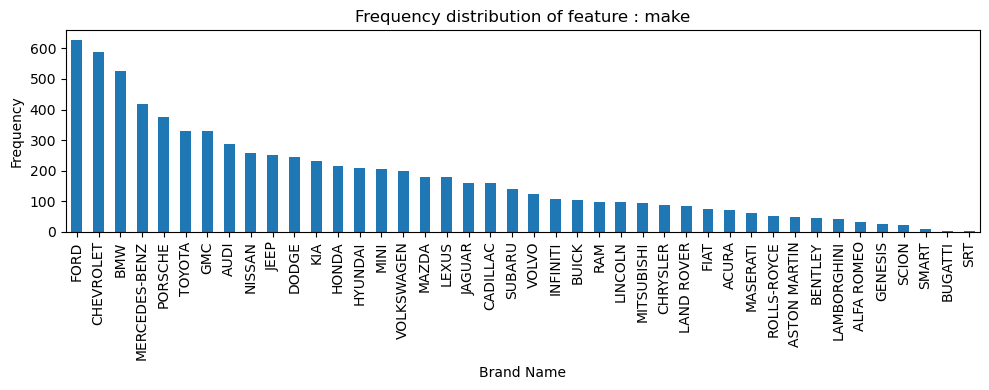

In [26]:
plt.figure(figsize=(10,4));
df.groupby("make")["make"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : make", fontsize=12)
plt.ylabel("Frequency", fontsize=10)
plt.xlabel("Brand Name", fontsize=10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **1. Out of the 42 car brands Ford(628) and Chevrolet(588) are the most dominating ones. Whereas cars of Smart(7), Bugati(3) and SRT(2) are the ones with lowest frequency**

# **Working with only the Top 20 model.**

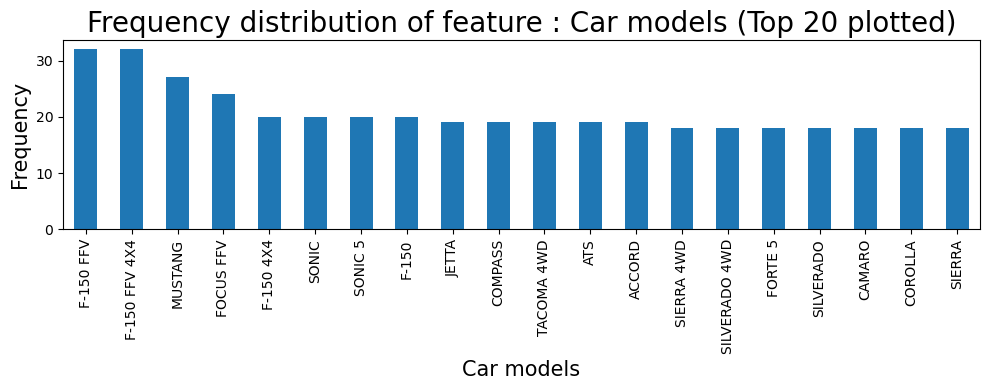

In [27]:
plt.figure(figsize=(10,4));
df.groupby("model")["model"].count().sort_values(ascending=False)[:20].plot(kind="bar")
plt.title("Frequency distribution of feature : Car models (Top 20 plotted)", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Car models", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **3.Feature : Vehicle Class**

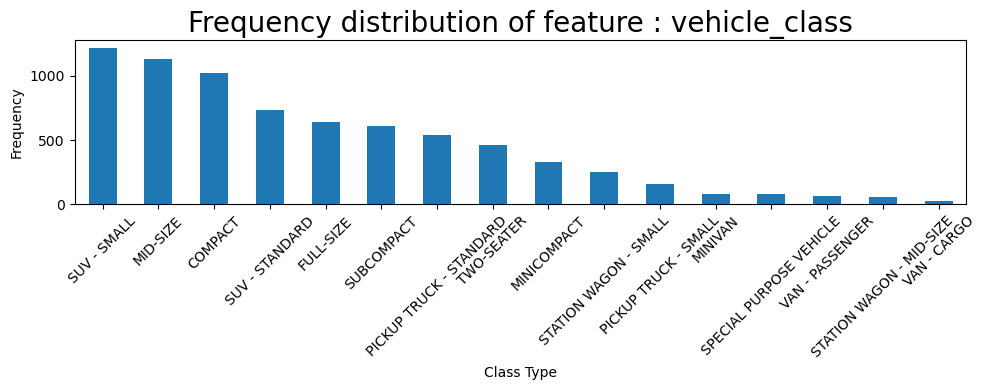

In [28]:
plt.figure(figsize=(10,4));
df.groupby("vehicle_class")["vehicle_class"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : vehicle_class", fontsize=20)
plt.ylabel("Frequency", fontsize=10)
plt.xlabel("Class Type", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**1.SUV-Small(1217) and MID-Size(1133) vehicles are the most frequent.**

## **4. Feature : Transmission**

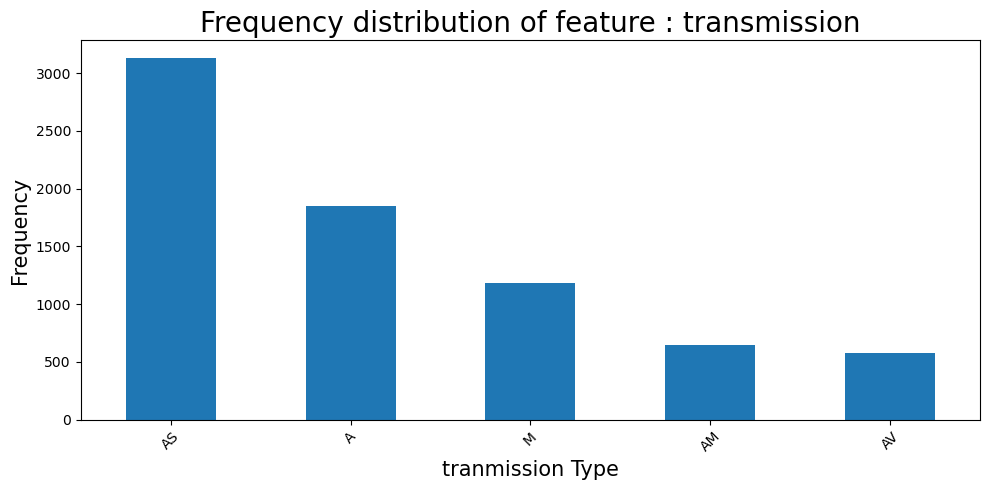

In [29]:
plt.figure(figsize=(10,5));
df.groupby("transmission")["transmission"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : transmission", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("tranmission Type", fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **1. Frequency of car with Transmission type Automatic with Select AS(3127) is the highest and with Continuously Variable Transmission AV(576) is the lowest.**

# **5.Feature : Fuel Type**

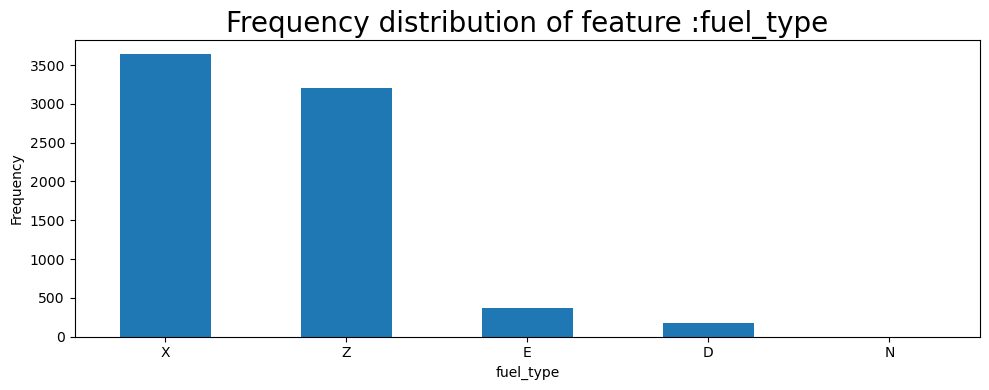

In [30]:
plt.figure(figsize=(10,4));
df.groupby("fuel_type")["fuel_type"].count().sort_values(ascending=False).plot(kind="bar")

plt.title("Frequency distribution of feature :fuel_type", fontsize=20)
plt.ylabel("Frequency", fontsize=10)
plt.xlabel("fuel_type", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**1.Car which runs on fuel let it be X(3637) or Z(3202) is the most common vehicle type. And cars running on D(175) are very low in frquency and there is only one sample which uses Natural Gases**

# **Variation in CO2 emissions with different features**

# **1. Feature : Make**

Text(0, 0.5, 'co2_emissions')

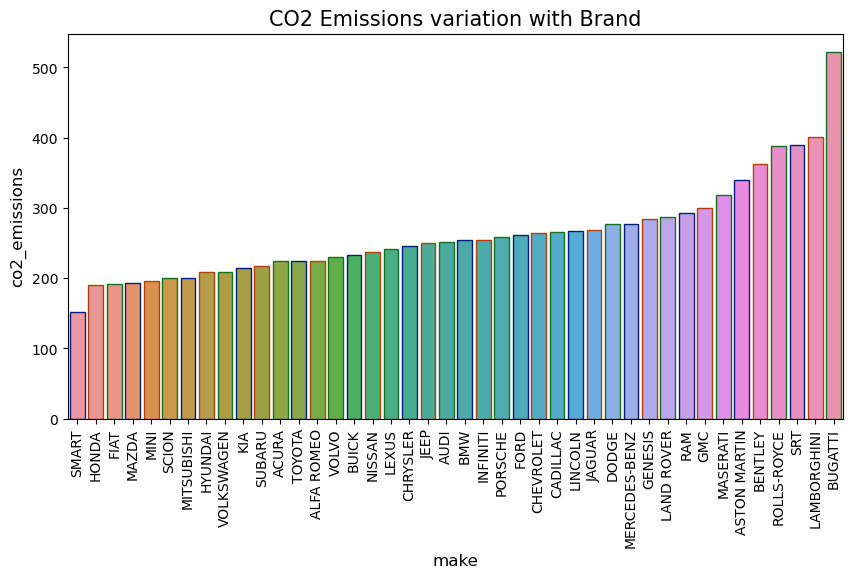

In [31]:
CO2_make = df.groupby(['make'])['co2_emissions'].mean().sort_values().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x = "make",y="co2_emissions",data = CO2_make,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Brand', fontsize=15)
plt.xlabel('make', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('co2_emissions', fontsize=12)

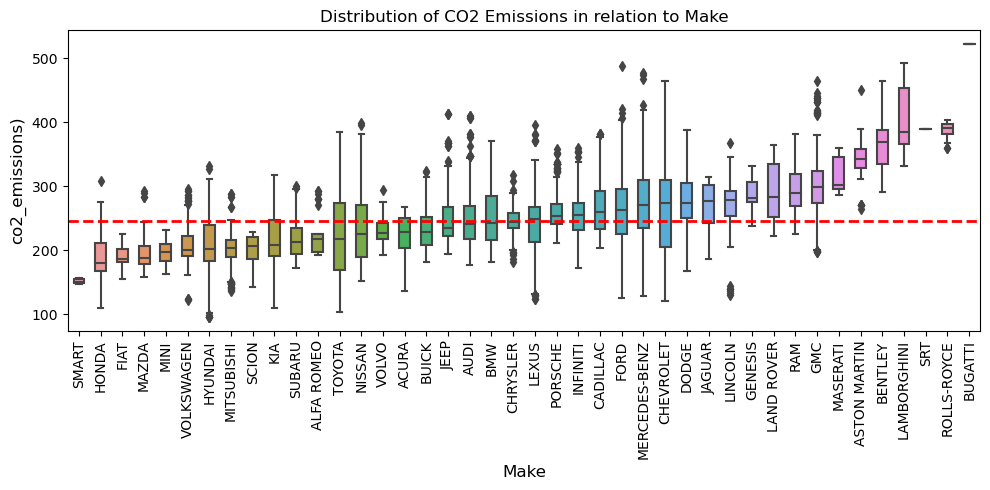

In [32]:
plt.figure(figsize=(10,5))
order = df.groupby("make")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="make", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Make", fontsize=12)
plt.ylabel("co2_emissions)", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

### **1. From both the bar graph and the box plot it can be inferred that average CO2 emissions of cars belonging to the brand Bugatti is the highest and cars of SMART has the lowest emissions.**
### **2. The red line signify the sample mean of CO2 emissions.**
### **3. Almost 50% of the brand has their median CO2 emissions less than the sample median of CO2 emissions by all the cars.**

# **2. Feature : Vehicle Class**

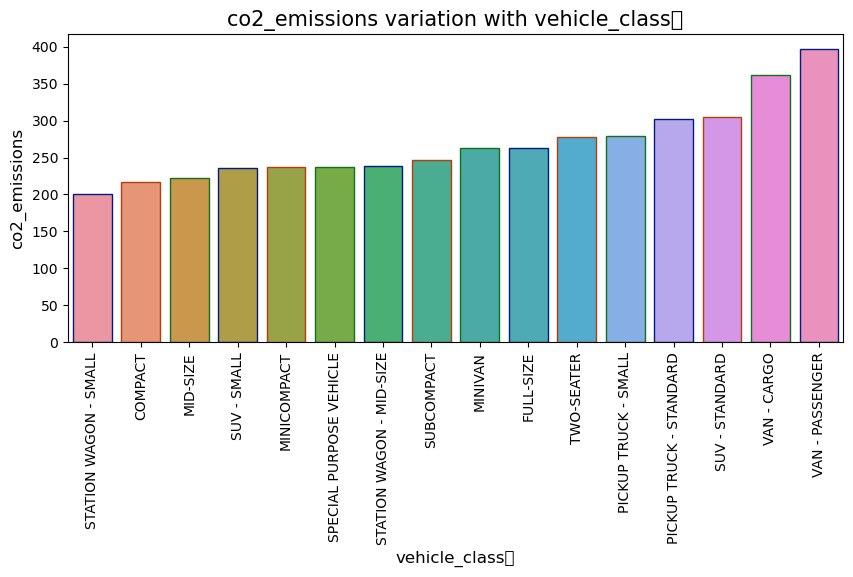

In [33]:
CO2_class = df.groupby(['vehicle_class'])['co2_emissions'].mean().sort_values().reset_index()

plt.figure(figsize=(10,4))
sns.barplot(x = "vehicle_class",y="co2_emissions",data = CO2_class,
            edgecolor=sns.color_palette("dark", 3))
plt.title('co2_emissions variation with vehicle_class	', fontsize=15)
plt.xlabel('vehicle_class	', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('co2_emissions', fontsize=12)
plt.show()

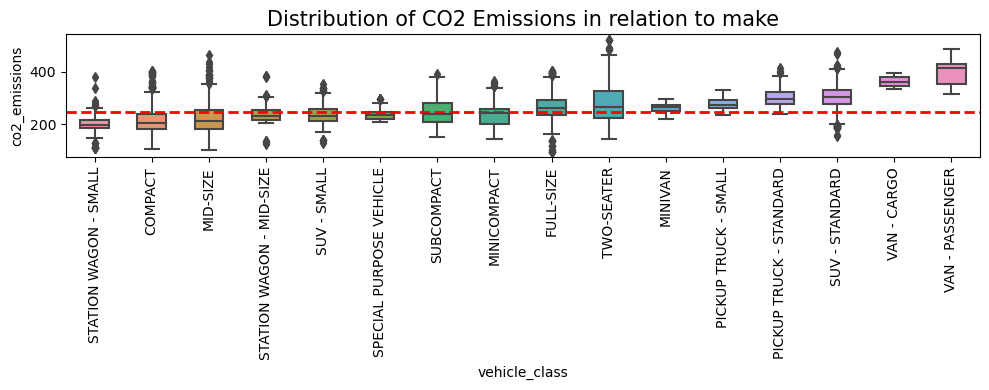

In [34]:
plt.figure(figsize=(10,4))
order = df.groupby("vehicle_class")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="vehicle_class", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("vehicle_class", fontsize=10)
plt.ylabel("co2_emissions", fontsize=10)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

### **1. The vehicle of class VAN-Passenger followed by VAN-Cargo has the highest CO2 emissions among all. And Station Wagon-Small has the lowest CO2 emissions.**
### **2. There are 8 types of vehicle class out of 16 which has a median CO2 emissions less than sample median of CO2 emissions and the other 8 has a higher median.**

# **3. Feature : Transmission**

Text(0, 0.5, 'co2_emissions')

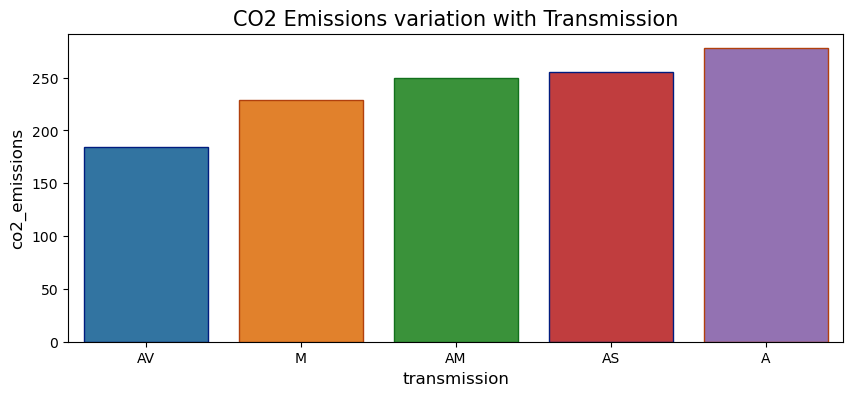

In [35]:
CO2_transmission = df.groupby(["transmission"])['co2_emissions'].mean().sort_values().reset_index()

plt.figure(figsize=(10,4))
sns.barplot(x = "transmission",y="co2_emissions", data = CO2_transmission,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Transmission', fontsize=15)
plt.xlabel('transmission', fontsize=12)
plt.xticks(horizontalalignment='center')
plt.ylabel('co2_emissions', fontsize=12)

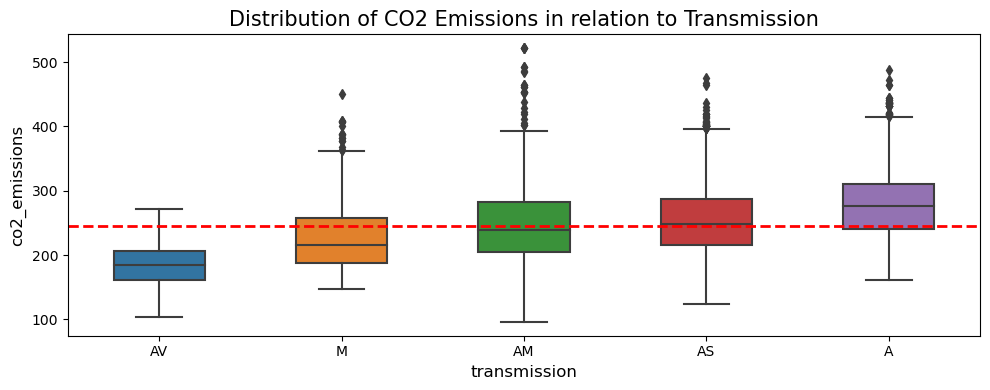

In [36]:
plt.figure(figsize=(10,4))
order = df.groupby("transmission")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="transmission", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Transmission", fontsize=15)
plt.xlabel("transmission", fontsize=12)
plt.ylabel("co2_emissions", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

### **1. Vehicles with Automatic transmission exhibit highest CO2 emissions and vehicle with Continuously Variable Transmission shows the lowest CO2 emissions.**
### **2. Median CO2 emissions of Automated Manual and Automatic with Select Shift vehicles is almost similar to that of sample median CO2 emissions.**

# **4. Feature : Fuel Type**

Text(0, 0.5, 'co2_emissions')

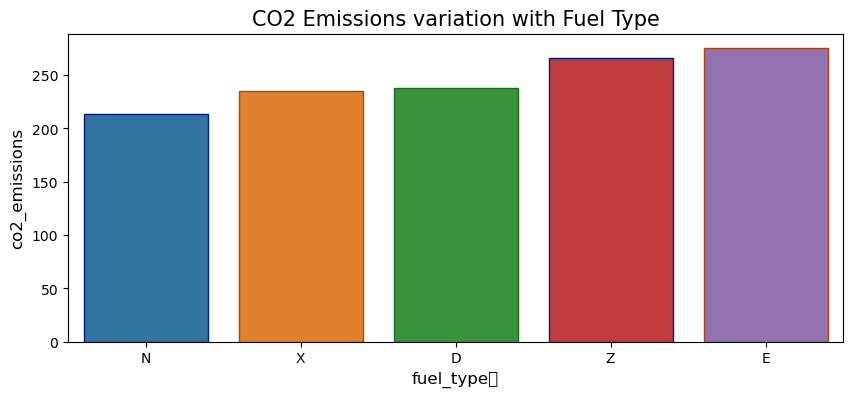

In [37]:
CO2_fuel_type = df.groupby(['fuel_type'])['co2_emissions'].mean().sort_values().reset_index()

plt.figure(figsize=(10,4))
sns.barplot(x = "fuel_type",y="co2_emissions",data = CO2_fuel_type,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Fuel Type', fontsize=15)
plt.xlabel('fuel_type	', fontsize=12)
plt.ylabel('co2_emissions', fontsize=12)

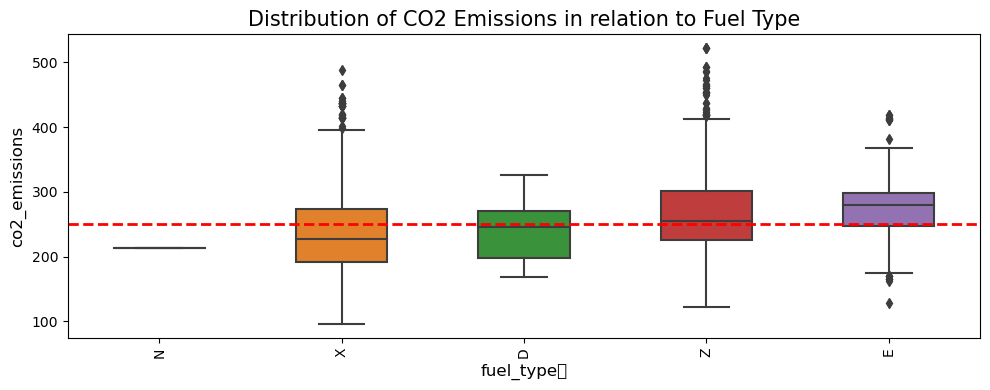

In [38]:
plt.figure(figsize=(10,4))
order = df.groupby("fuel_type")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="fuel_type", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Fuel Type", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("fuel_type	", fontsize=12)
plt.ylabel("co2_emissions", fontsize=12)
plt.axhline(df["co2_emissions"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

### **1. Cars running on E(E85) has the highest CO2 emissions with almost all the values higher than the sample median CO2 emissions.**
### **2. N has the lowest CO2 emissions, but there is only one vehicle that use it as fuel. Other than that Regular fuel has the lowest CO2 emissions with almost 75% values less than sample median.**
### **3. The median CO2 emissions of fuel type N and D has almost similar median to that of the sample median.**

# **To check the shape of the distribution and skewness of each feature**

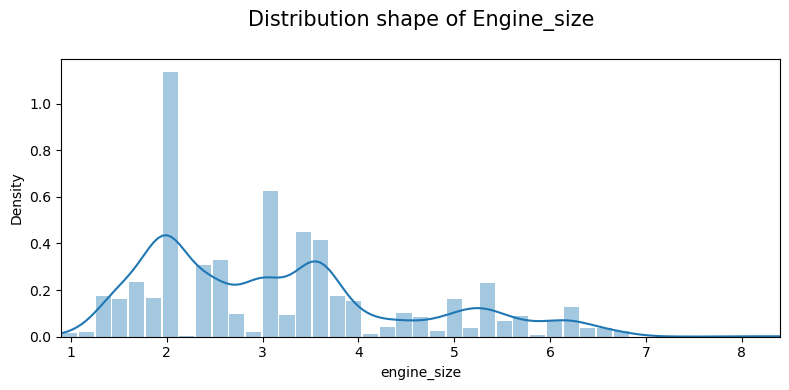

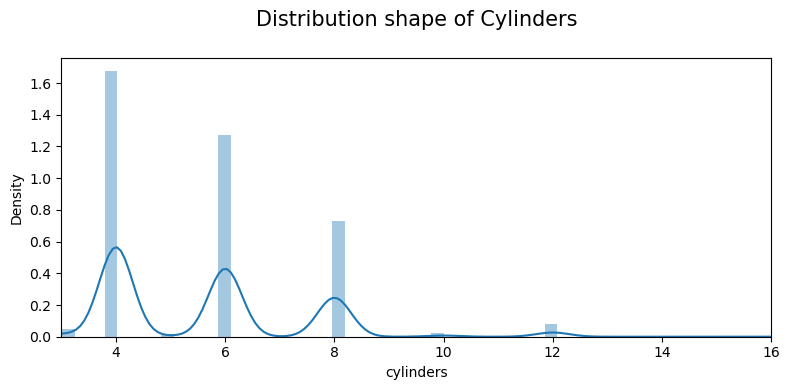

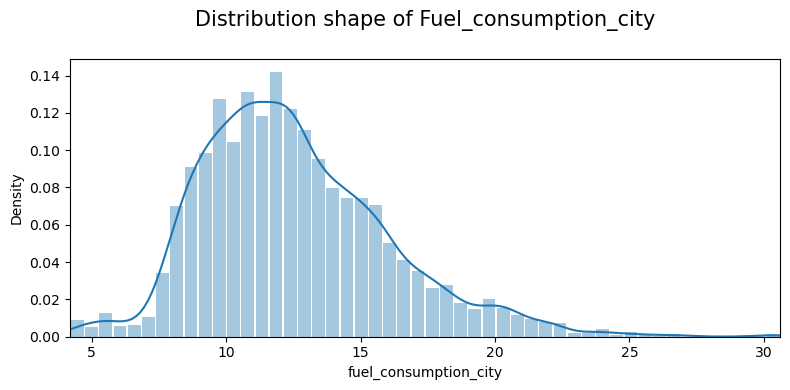

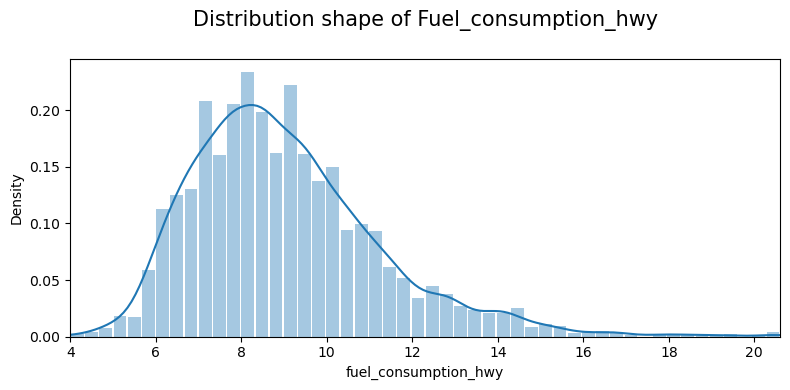

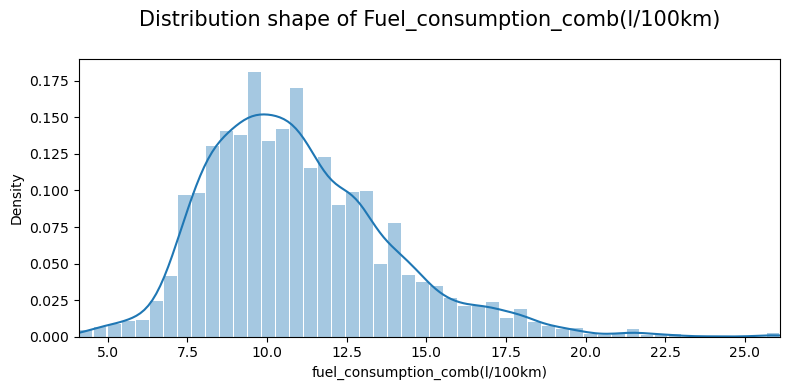

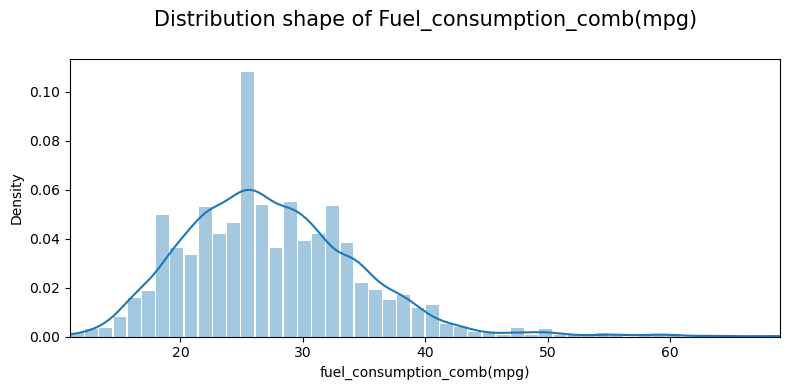

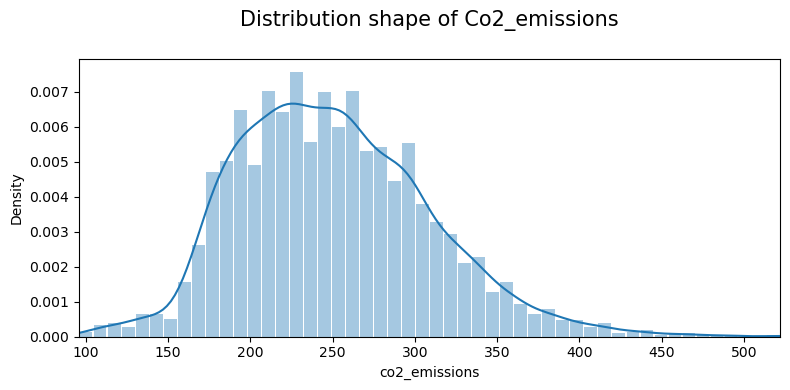

In [39]:
for feature in df.select_dtypes("number").columns:

    plt.figure(figsize=(8,4))
    sns.distplot(df[feature], hist_kws={"rwidth": 0.9})
    plt.xlim(df[feature].min(), df[feature].max())
    plt.title(f"Distribution shape of {feature.capitalize()}\n", fontsize=15)
    plt.tight_layout()
    plt.show()

### **From the Box plot we can infer**
**1. The minimum value of the CO2 emission is around 96.**

**2. The median CO2 emission is 246.**

**3. The 25% of the samples have CO2 emission between 96 and 208.**

**4. The 75% of the samples have CO2 emission between 96 and 288.**

**5. There are no outliers in the lower half but there are outliers in the upper half.**

**6. The maximum CO2 emissions observed is 522 which is an outlier.**

**7. The distribution of CO2 emissions is positively skewed.**

# **CORRELATION MATRIX**

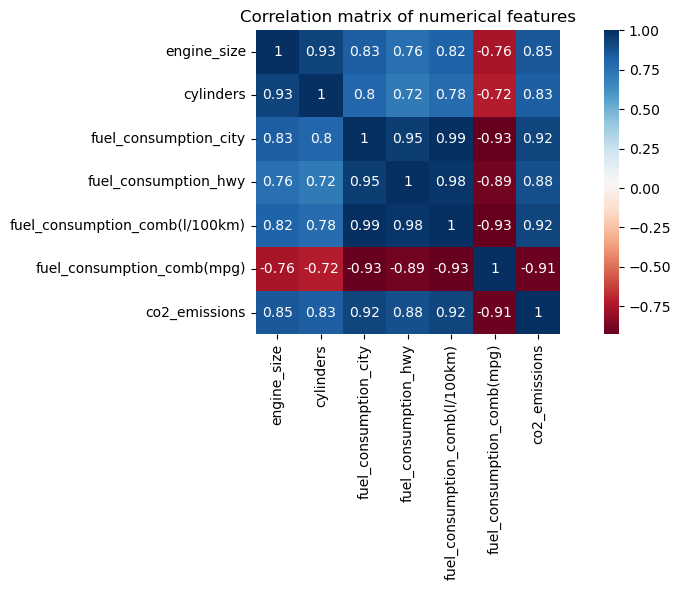

In [40]:
corr = df.corr()
plt.subplots(figsize=(10,6));
sns.heatmap(corr, annot=True, cmap="RdBu", square=True)
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

**1. Fuel Consumption Comb (mpg) is negatively correlated to all the features.**

**2. All the other features are postively correlated with each other.**

**3. Both Fuel Consumption City  and Fuel Consumption Hwy have very strong positive correlation of 0.99 and 0.98 with Fuel Consumption Comb (L/100 km), since Fuel Consumption Comb (L/100 km) is redundant.**

**4. Our dependent variable co2_emissions has highest positive correlation of 0.92 with Fuel Consumption City and Fuel Consumption Comb (L/100 km) and strong negative correlation of -0.91 with Fuel Consumption Comb (mpg).**

# **Correlation of independent features with dependent variable**

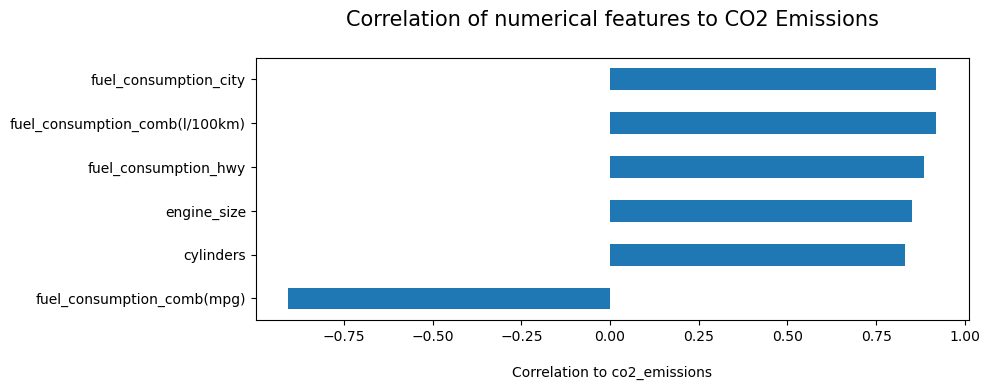

In [41]:
plt.figure(figsize=(10,4))
corr["co2_emissions"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to CO2 Emissions\n", fontsize=15)
plt.xlabel("\nCorrelation to co2_emissions")
plt.tight_layout()
plt.show()

# **Variation in CO2 emissions with different features**

## **1. Feature : Cylinders**

Text(0, 0.5, 'co2_emissions')

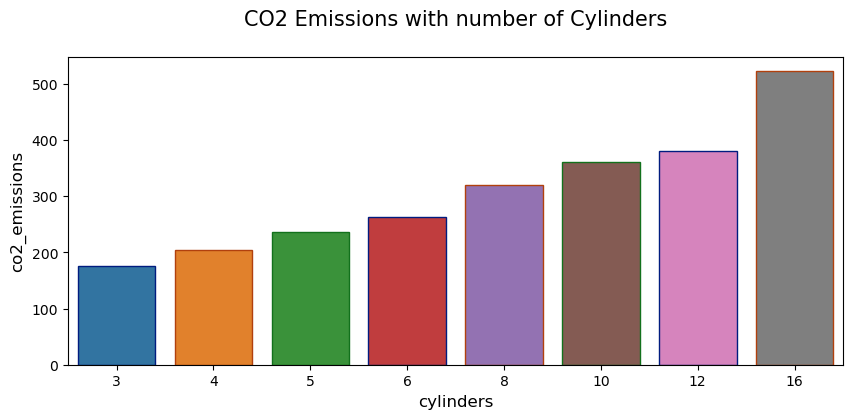

In [42]:
CO2_cylinder = df.groupby(['cylinders'])['co2_emissions'].mean().reset_index()

plt.figure(figsize=(10,4))
sns.barplot(x = "cylinders",y="co2_emissions",data = CO2_cylinder,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with number of Cylinders\n', fontsize=15)
plt.xlabel('cylinders', fontsize=12)
plt.ylabel('co2_emissions', fontsize=12)

Text(0, 0.5, 'fuel_consumption_comb(l/100km)')

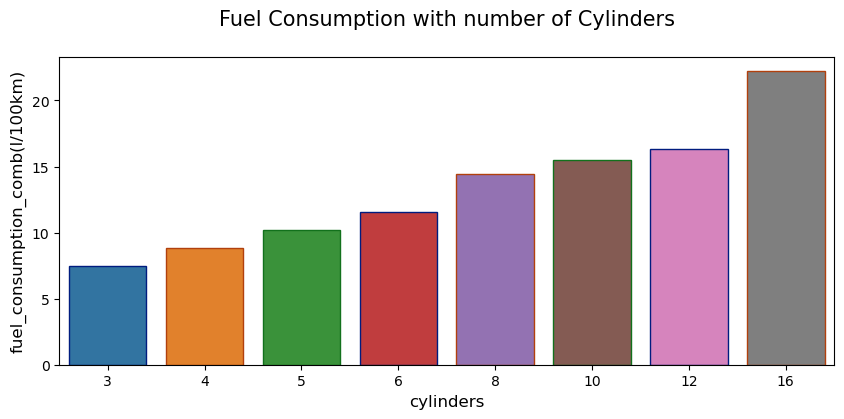

In [43]:
fuel_cylinder = df.groupby(['cylinders'])['fuel_consumption_comb(l/100km)'].mean().reset_index()

plt.figure(figsize=(10,4))
sns.barplot(x = "cylinders",y="fuel_consumption_comb(l/100km)",data = fuel_cylinder,
            edgecolor=sns.color_palette("dark", 3))
plt.title('Fuel Consumption with number of Cylinders\n', fontsize=15)
plt.xlabel('cylinders', fontsize=12)
plt.ylabel('fuel_consumption_comb(l/100km)', fontsize=12)

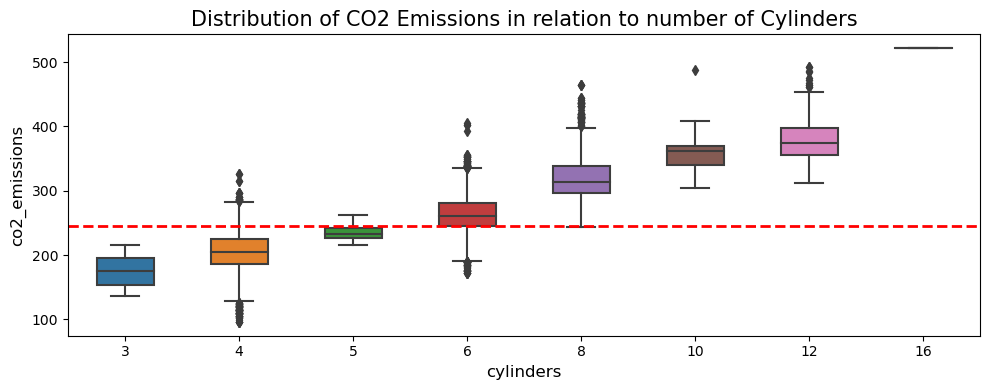

In [44]:
plt.figure(figsize=(10,4))
order = df.groupby("cylinders")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="cylinders", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to number of Cylinders", fontsize=15)
plt.xlabel("cylinders", fontsize=12)
plt.ylabel("co2_emissions", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

### **1. With increase in number of Cylinders, CO2 emissions also increase proportionally.**

### **2. The same trend can be observed for Cylinder vs Combined Fuel Consumption. And since Combined Fuel Consumption is strongly postively correlated with CO2 emissions, so with increase in number of cylinders, CO2 emissions also increases.**
### **3. Vehicles with number of cylinders more than 5 has a median CO2 emissions greater than the sample median CO2 emissions.**

### **4. Vehicles with less than 6 cylinder have almost all the sample with median CO2 emissions less than sample median.**

### **5. Whereas vehicles with more than 5 cylinders have almost 100% sample with median CO2 emissions more than the sample median.**

## **2. Feature : Engine Size**

Text(0, 0.5, 'co2_emissions')

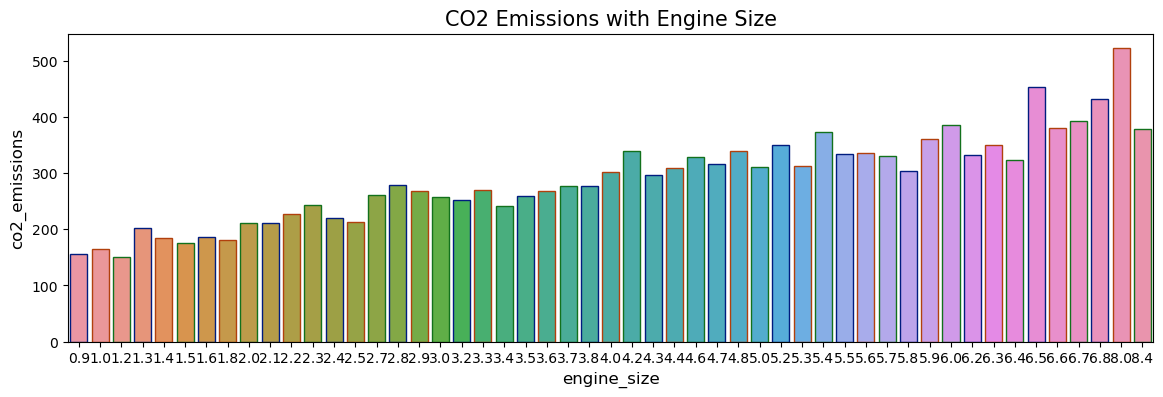

In [45]:
CO2_engine = df.groupby(['engine_size'])['co2_emissions'].mean().reset_index()

plt.figure(figsize=(14,4))
sns.barplot(x = "engine_size",y="co2_emissions",data = CO2_engine,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Engine Size', fontsize=15)
plt.xlabel('engine_size', fontsize=12)
plt.ylabel('co2_emissions', fontsize=12)

Text(0, 0.5, 'fuel_consumption_comb(l/100km)')

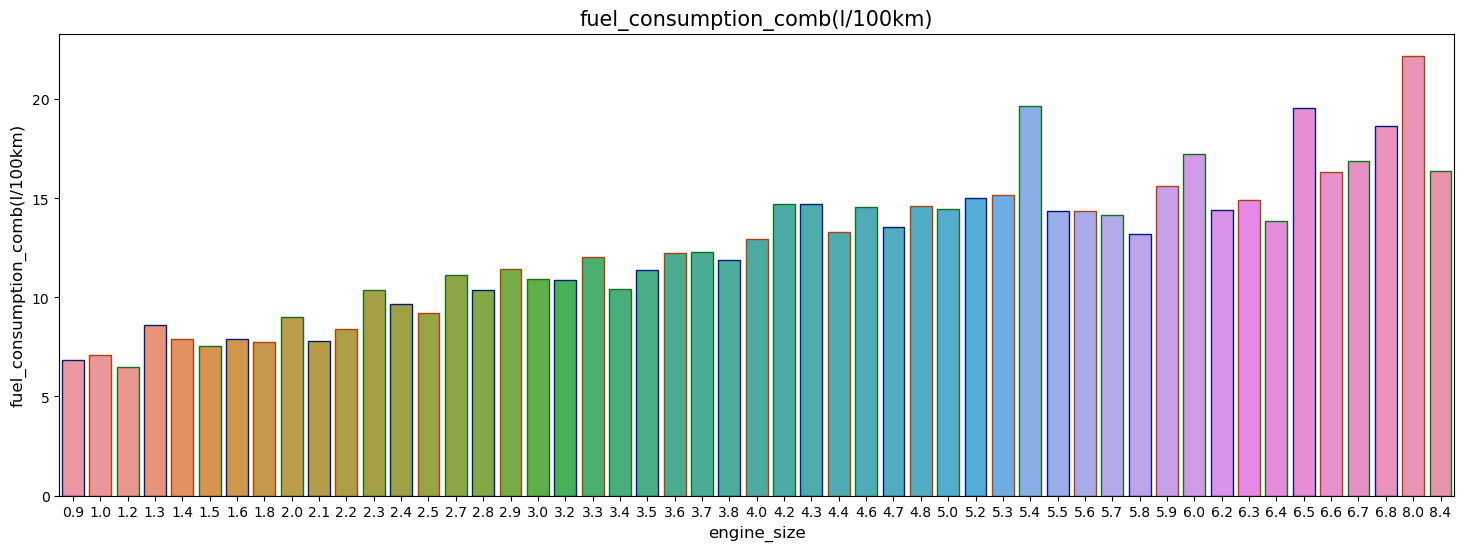

In [46]:
fuel_engine = df.groupby(['engine_size'])['fuel_consumption_comb(l/100km)'].mean().reset_index()

plt.figure(figsize=(18,6))
sns.barplot(x = "engine_size",y="fuel_consumption_comb(l/100km)",data = fuel_engine,
            edgecolor=sns.color_palette("dark", 3))
plt.title('fuel_consumption_comb(l/100km)', fontsize=15)
plt.xlabel('engine_size', fontsize=12)
plt.ylabel('fuel_consumption_comb(l/100km)', fontsize=12)

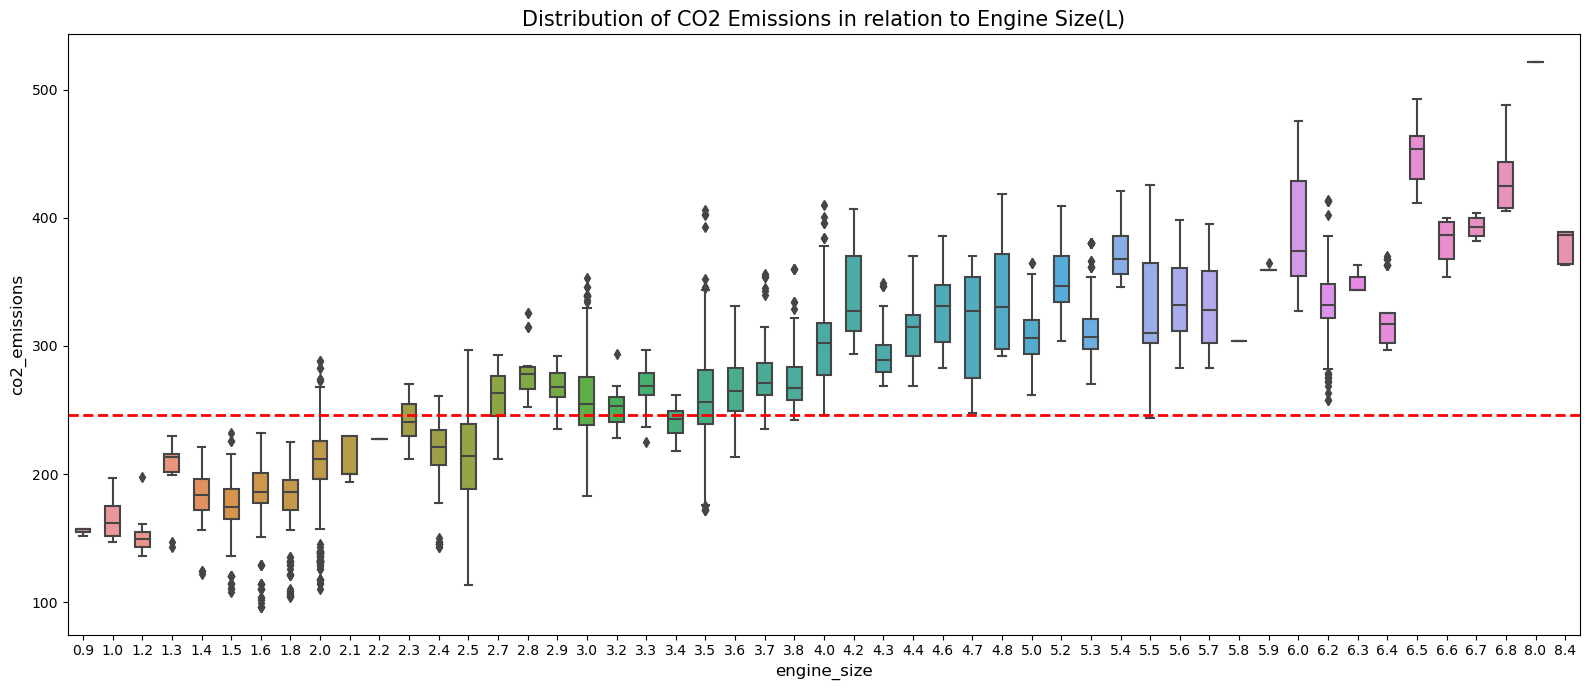

In [47]:
plt.figure(figsize=(16,7))
order = df.groupby("engine_size")["co2_emissions"].median().index
sns.boxplot(x="engine_size", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Engine Size(L)", fontsize = 15)
plt.xlabel("engine_size", fontsize = 12)
plt.ylabel("co2_emissions", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

### **1. With increase in Engine Size, CO2 emissions also increases.**
### **2. The same trend can be observed for Engine Size vs Combined Fuel Consumption also. And since Combined Fuel Consumption is strongly postively correlated with CO2 emissions, so as Engine Size increases CO2 emissions also increases.**
### **3. Vehicles with Engines Size more than 2.5L has a median CO2 emissions greater than or equal to the sample median CO2 emissions.**

## **3. Feature : fuel_consumption_city**

Text(0, 0.5, 'co2_emissions')

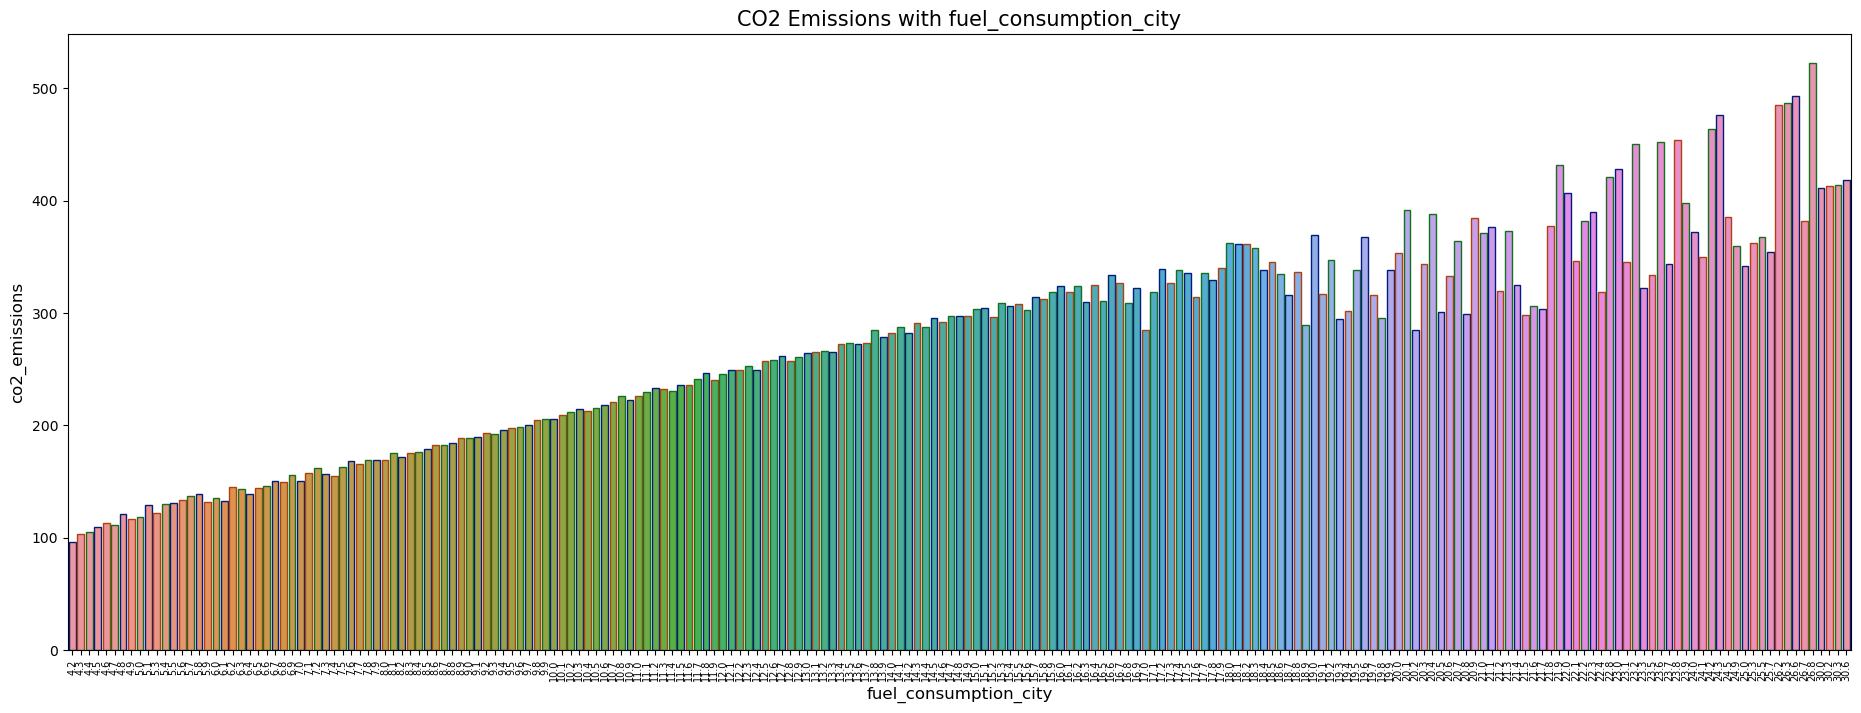

In [48]:
CO2_city = df.groupby(['fuel_consumption_city'])['co2_emissions'].mean().reset_index()

plt.figure(figsize=(23,8))
sns.barplot(x = "fuel_consumption_city", y="co2_emissions",data = CO2_city,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with fuel_consumption_city', fontsize=15)
plt.xlabel('fuel_consumption_city', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('co2_emissions', fontsize=12)

## **4. Feature :fuel_consumption_hwy**

Text(0, 0.5, 'co2_emissions')

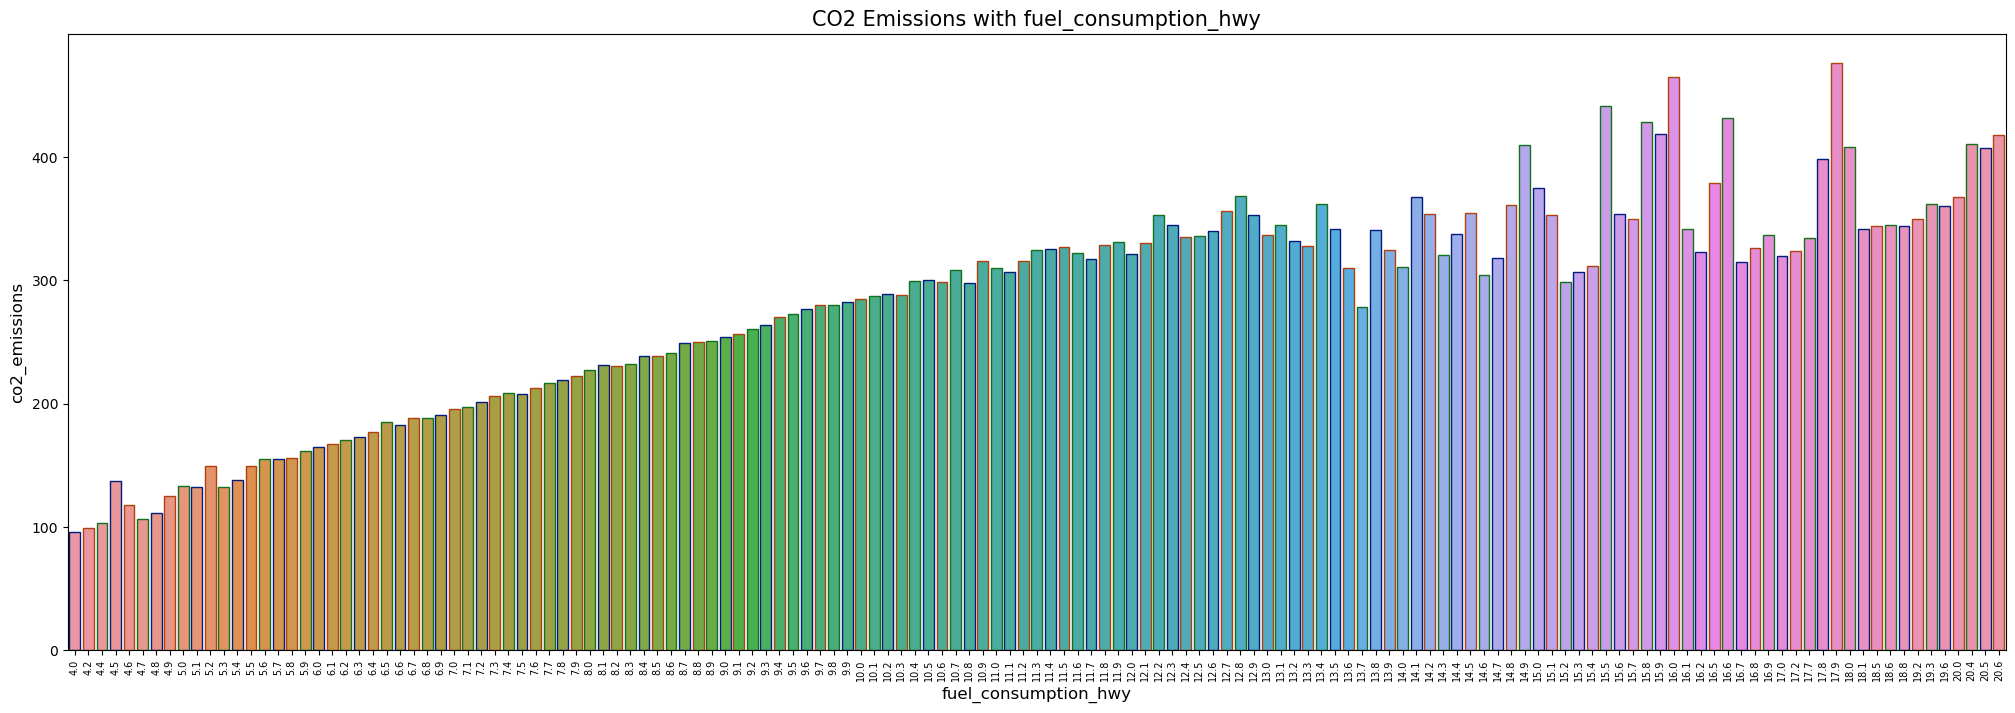

In [49]:
CO2_hwy = df.groupby(['fuel_consumption_hwy'])['co2_emissions'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "fuel_consumption_hwy", y="co2_emissions",data = CO2_hwy,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with fuel_consumption_hwy', fontsize=15)
plt.xlabel('fuel_consumption_hwy', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('co2_emissions', fontsize=12)

## **5. Feature : fuel_consumption_comb(l/100km)**

Text(0, 0.5, 'co2_emissions')

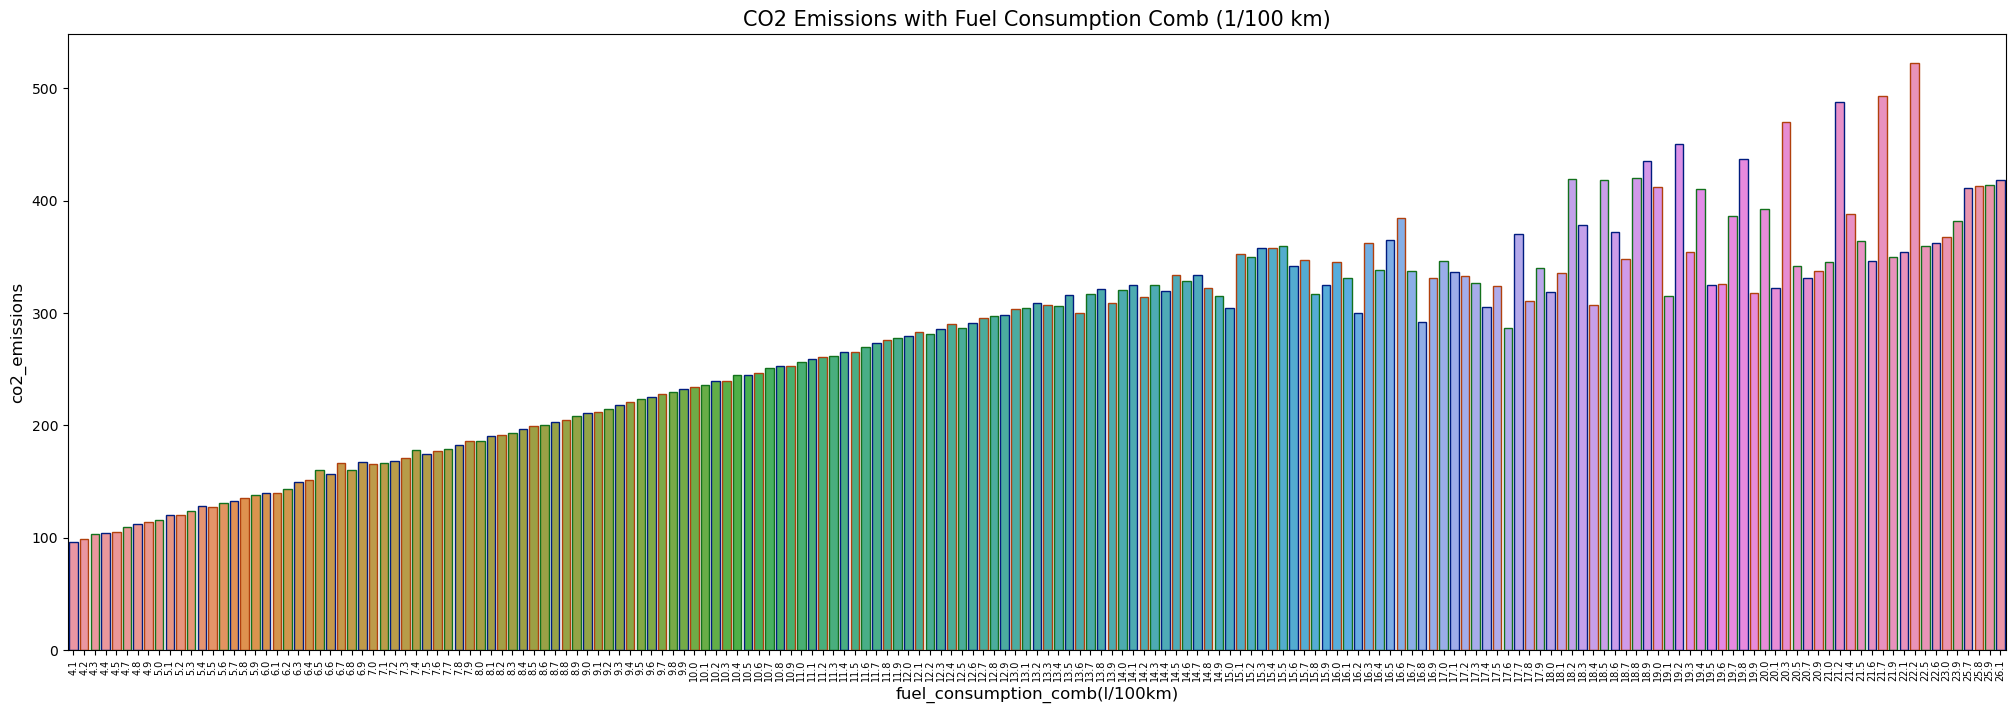

In [50]:
CO2_comb = df.groupby(['fuel_consumption_comb(l/100km)'])['co2_emissions'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "fuel_consumption_comb(l/100km)", y="co2_emissions",data = CO2_comb,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Comb (1/100 km)', fontsize=15)
plt.xlabel('fuel_consumption_comb(l/100km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('co2_emissions', fontsize=12)

### **1. With the increase in fuel consumption the CO2 emissions also increases.**

### **2. From the plots we can see almost an linear increase in CO2 emissions with Fuel Consumption, as they are highly postively correlated.**

### **3. The same trend can be observed in all the three features representing Fuel Consumption in (L/100 km).**

## **6. Feature :  fuel_consumption_comb(mpg)**

Text(0, 0.5, 'co2_emissions')

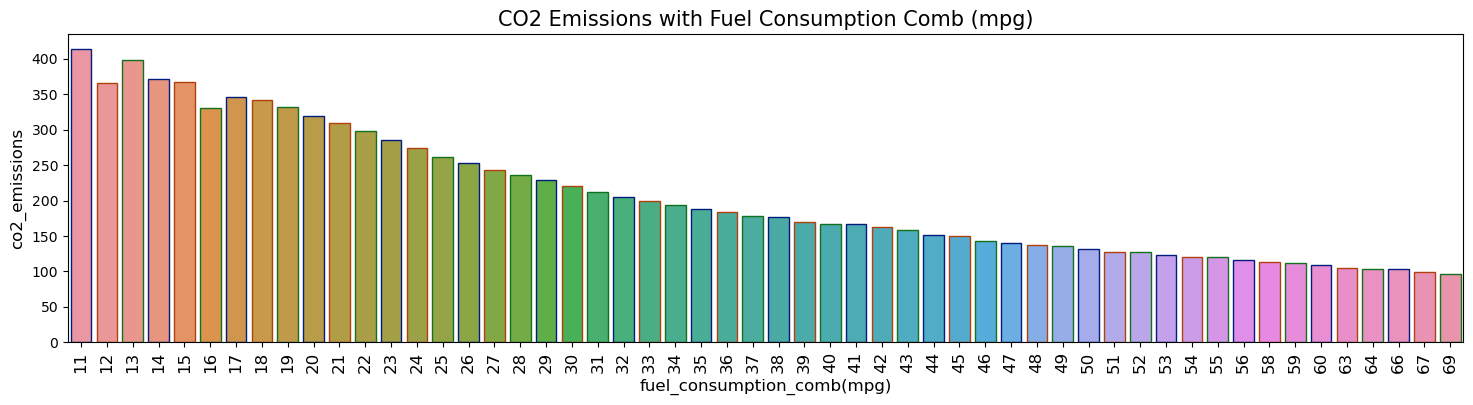

In [51]:
CO2_comb_mpg = df.groupby(['fuel_consumption_comb(mpg)'])['co2_emissions'].mean().reset_index()

plt.figure(figsize=(18,4))
sns.barplot(x = "fuel_consumption_comb(mpg)", y="co2_emissions",data = CO2_comb_mpg,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Comb (mpg)', fontsize=15)
plt.xlabel('fuel_consumption_comb(mpg)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='12')
plt.ylabel('co2_emissions', fontsize=12)

### **1. As infered from the correlation matrix that CO2 Emission and Fuel Consumption Comb(mpg) are strongly negatively correlated.**
### **2. The feature Fuel Consumption Comb(mpg) shows how many miles a car can go with one gallon of fuel. So less mile per gallon represents more fuel consumption. So it is logical to have negative correlation with CO2 emissions.**
### **3. So as Fuel Consumption Comb(mpg) decreases, CO2 emissios increases.**

# **Data Preprocessing**

# **Outliers**

##  Discovery of Outliers

In [52]:
df_num_features=df.select_dtypes(include=np.number)

# Identifying outliers using IQR

In [53]:
Q1 = df_num_features.quantile(0.25)
Q3 = df_num_features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

engine_size                        1.7
cylinders                          2.0
fuel_consumption_city              4.5
fuel_consumption_hwy               2.7
fuel_consumption_comb(l/100km)     3.7
fuel_consumption_comb(mpg)        10.0
co2_emissions                     80.0
dtype: float64


In [54]:
outlier = pd.DataFrame((df_num_features < (Q1 - 1.5 * IQR)) | (df_num_features > (Q3 + 1.5 * IQR)))

for i in outlier.columns:
    print('Total number of Outliers in column {} are {}'.format(i, (len(outlier[outlier[i] == True][i]))))

Total number of Outliers in column engine_size are 137
Total number of Outliers in column cylinders are 196
Total number of Outliers in column fuel_consumption_city are 132
Total number of Outliers in column fuel_consumption_hwy are 208
Total number of Outliers in column fuel_consumption_comb(l/100km) are 142
Total number of Outliers in column fuel_consumption_comb(mpg) are 114
Total number of Outliers in column co2_emissions are 80


# **Visualizing outliers using Boxplots**

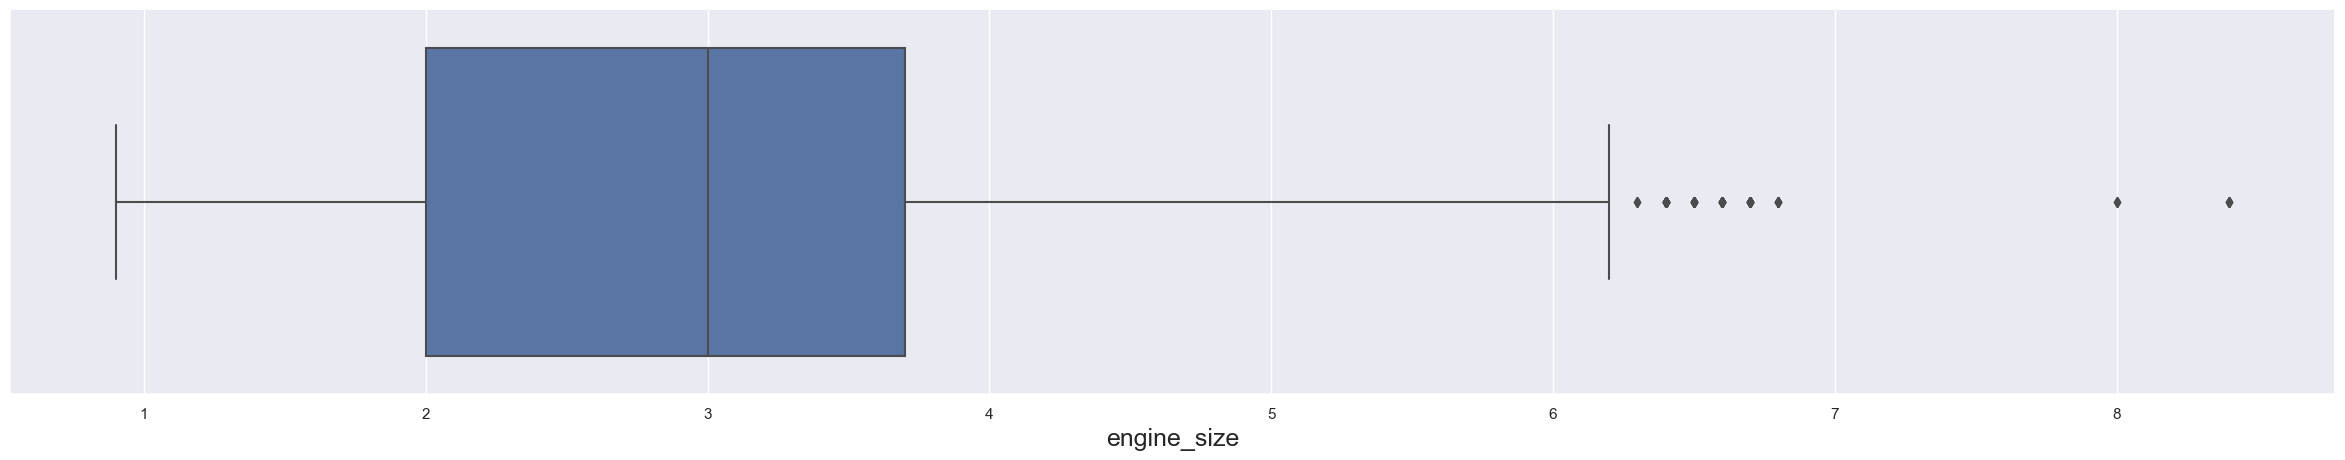

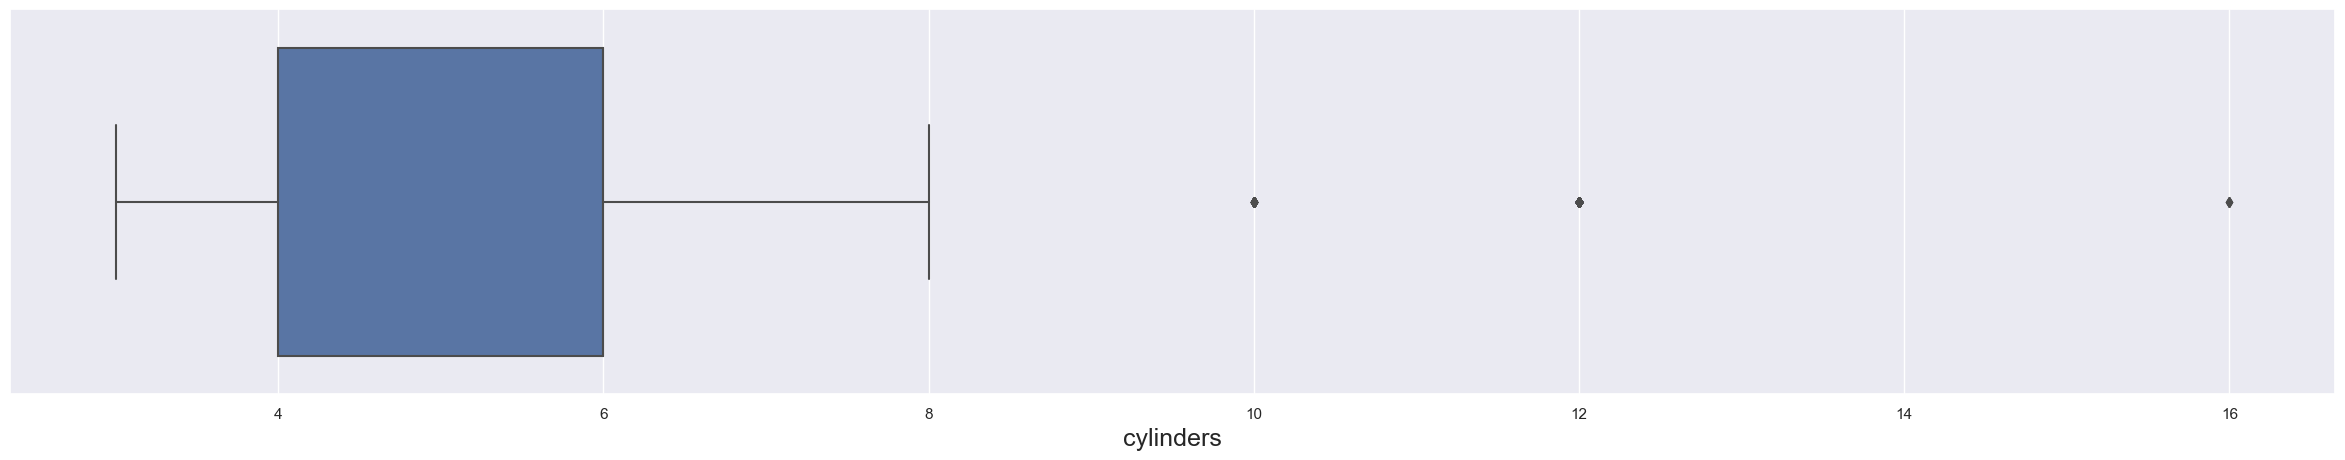

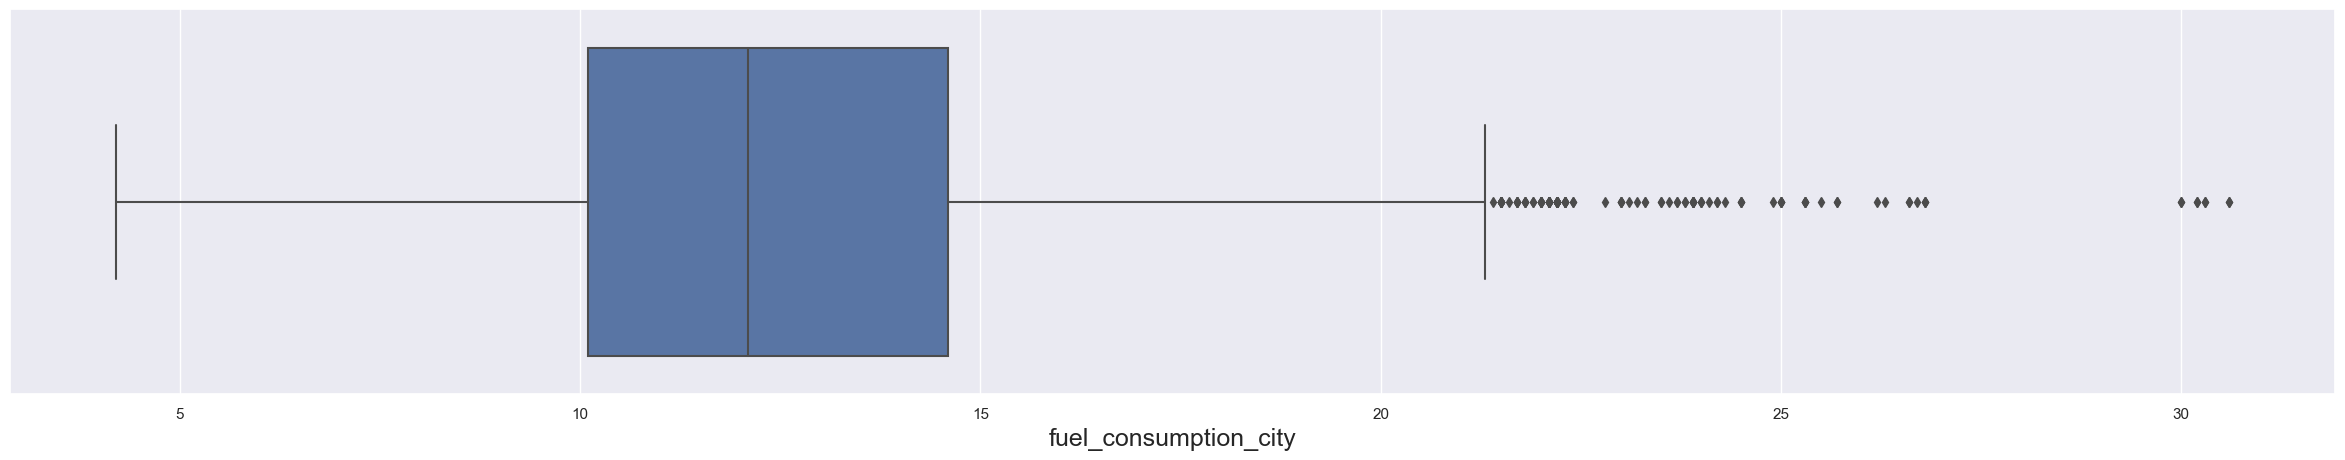

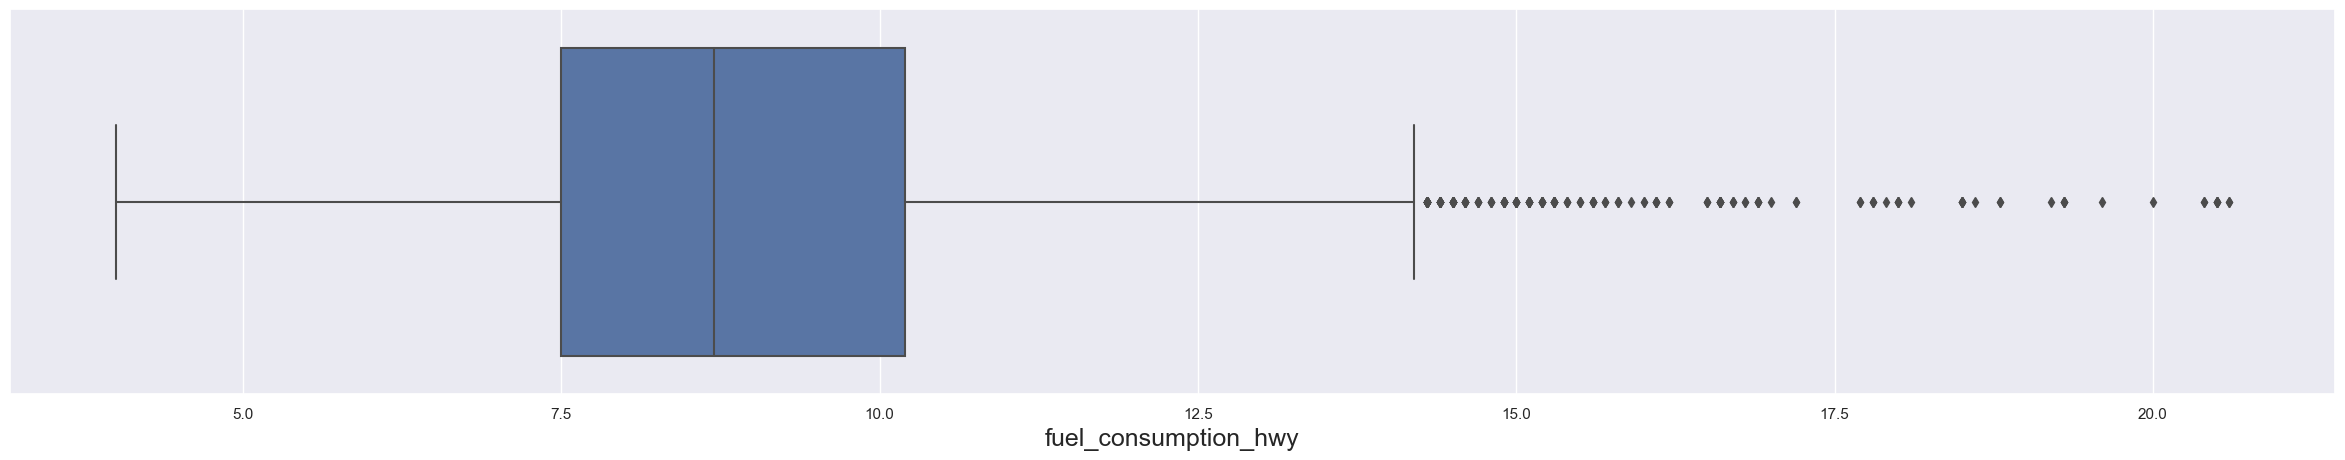

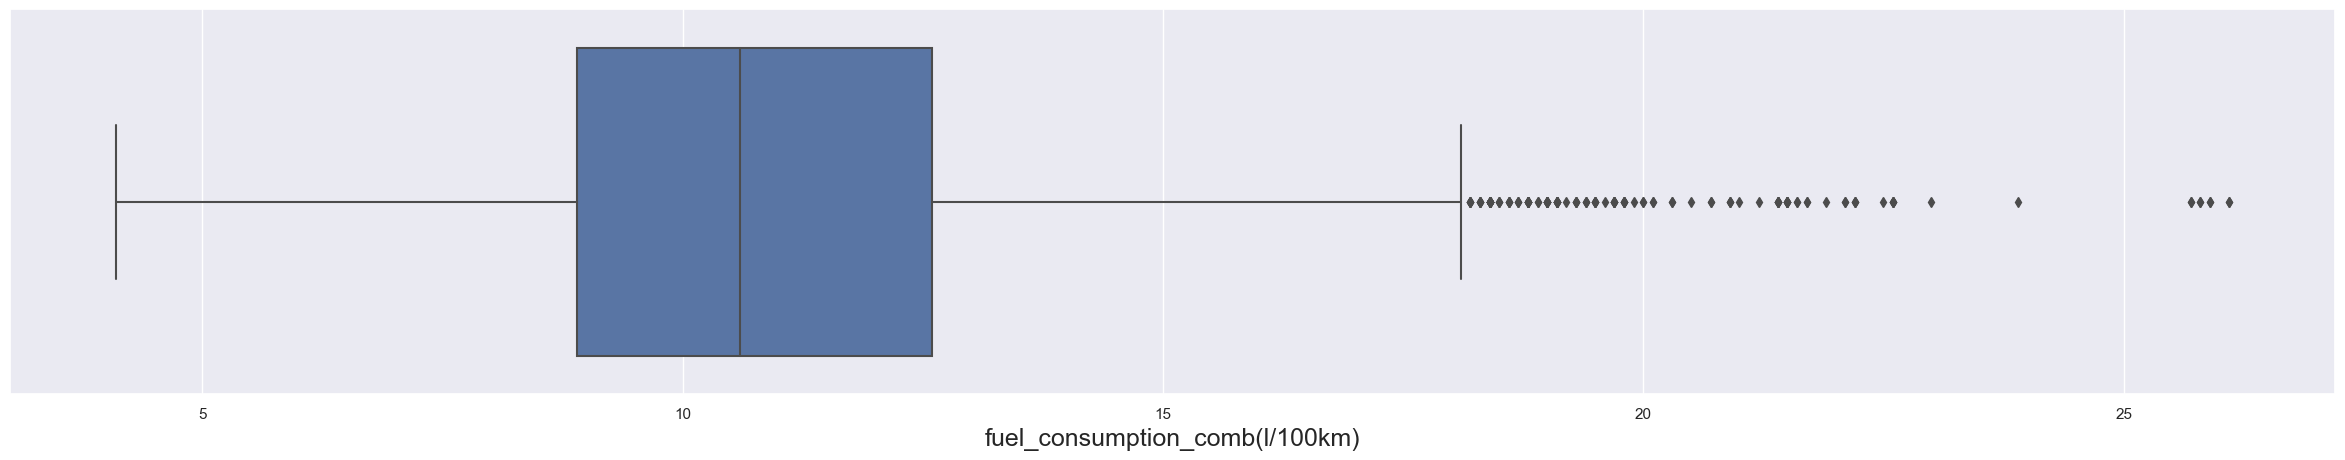

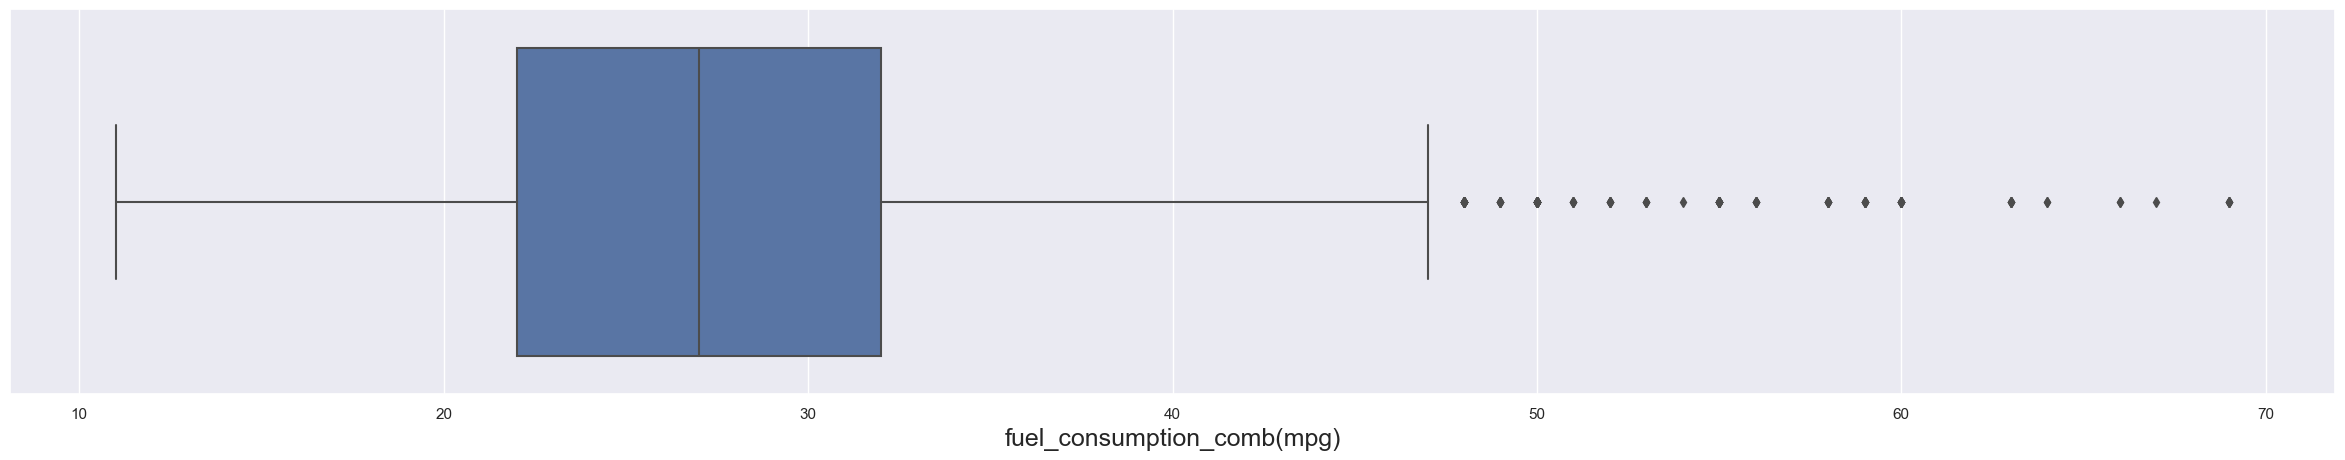

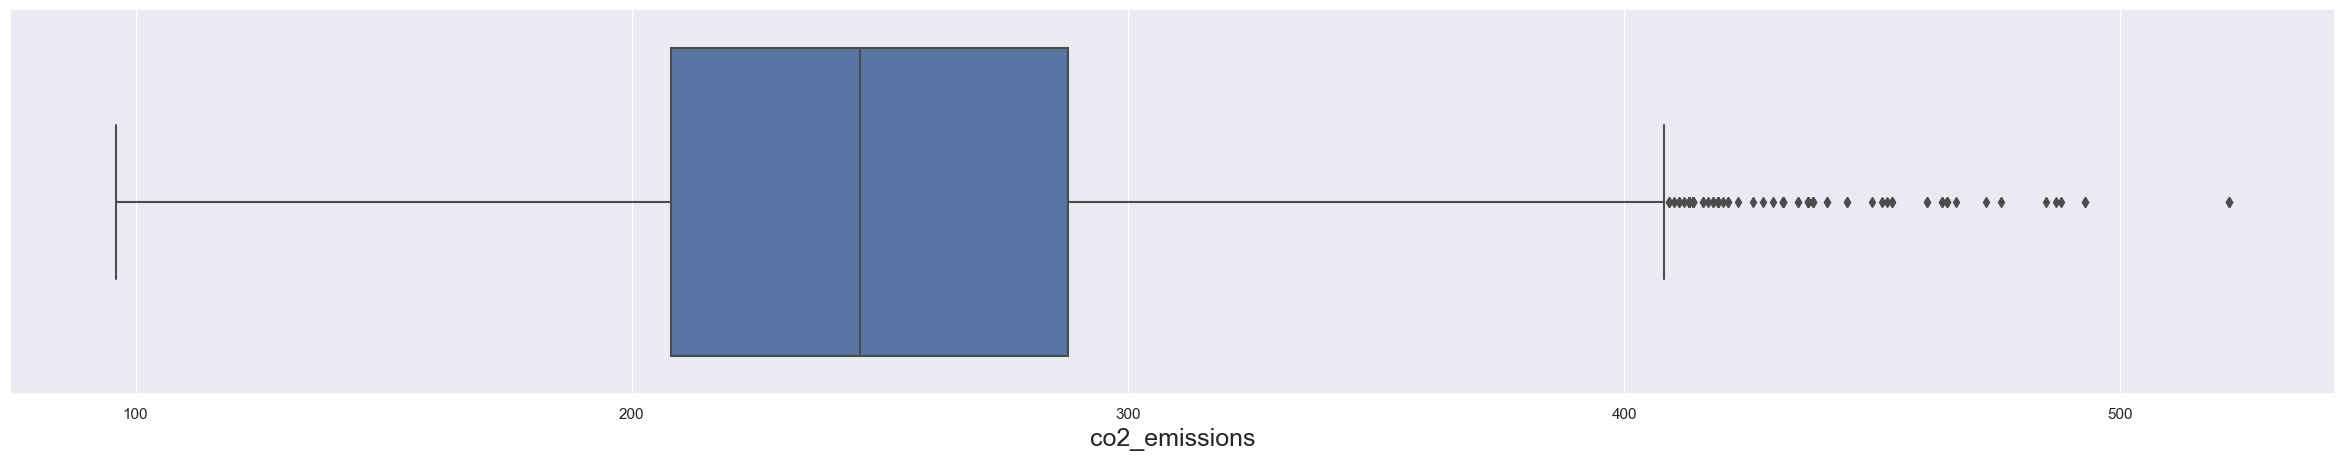

In [55]:
for column in enumerate(df_num_features):
    plt.figure(figsize=(30,5))
    sns.set_theme(style="darkgrid")
    sns.boxplot(x=column[1], data=  df_num_features)
    plt.xlabel(column[1],fontsize=18)
    plt.show()

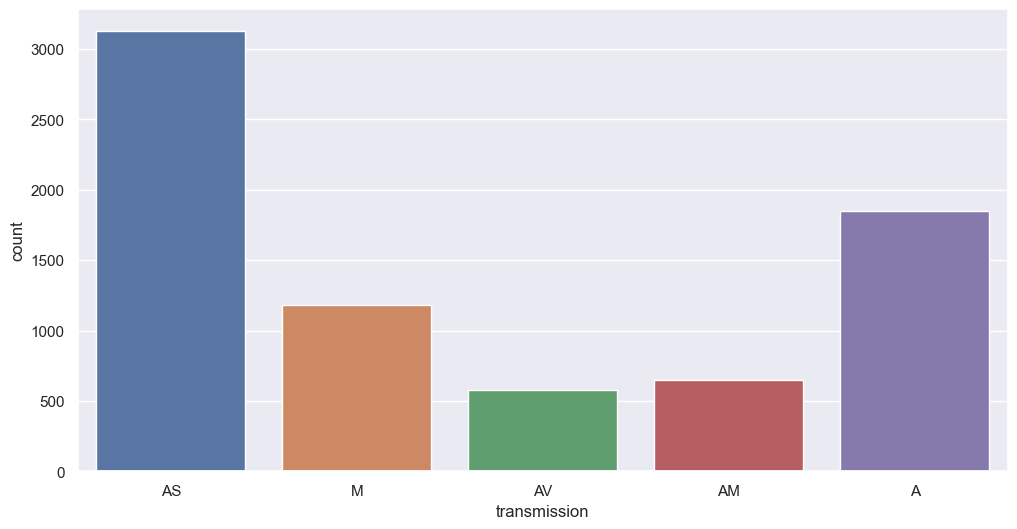

In [56]:
#count plot for transmission
plt.figure(figsize=(12,6))
sns.countplot(data=df,x=df['transmission'])
plt.show()

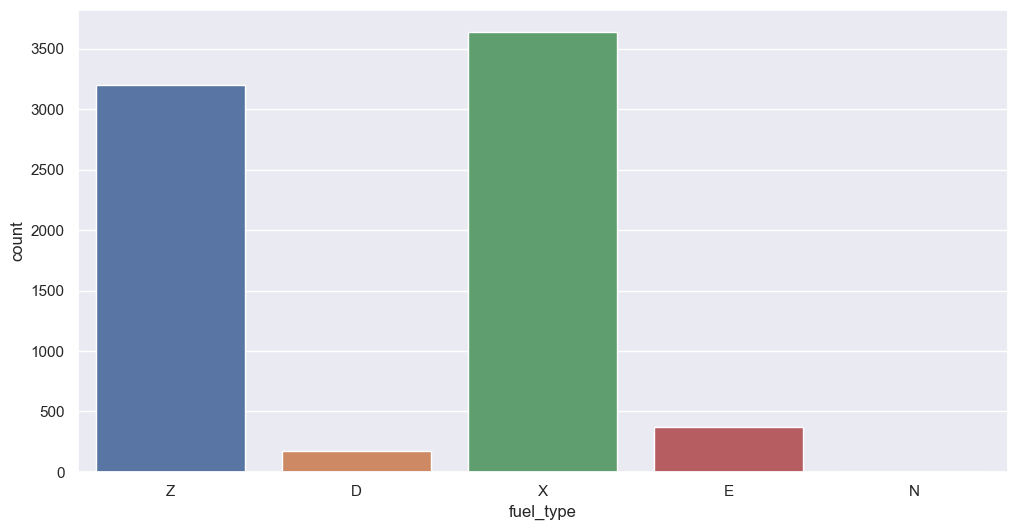

In [57]:
#count plot for fuel type
plt.figure(figsize=(12,6))
sns.countplot(data=df,x=df['fuel_type'])
plt.show()

we can see regular gas is high

# Removal of Outliers

Checking the normality of numeric features

In [58]:
from scipy.stats import shapiro
stat, p_value = shapiro(df_num_features)
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.5185874104499817
P-Value: 0.0


Since the numeric features are not normal we are removing the outliers using IQR method

In [59]:
data = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
data.reset_index(inplace=True, drop=True)

# Re-checking Correlation

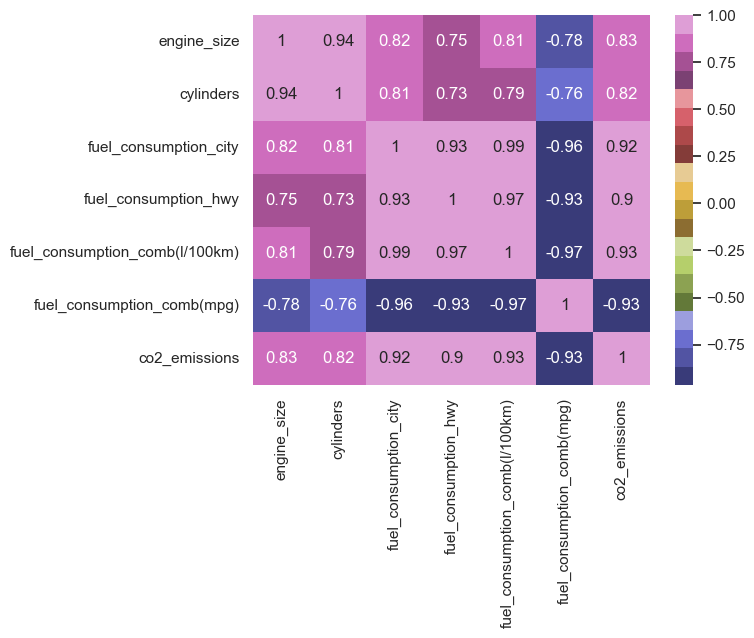

In [60]:
data_num_features = data.select_dtypes(include=np.number)

corr =  data_num_features.corr()

corr =data_num_features.corr(method='pearson')
sns.heatmap(corr, annot=True,cmap='tab20b')
plt.show()

There has been a slight change with respect to the correlation between numeric values



# **BOXPLOT**

Box Plots
A box plot is a way of statistically representing the distribution of the data through five main dimensions:

1.Minimun: Smallest number in the dataset.

2.First quartile: Middle number between the minimum and the median.

3.Second quartile (Median): Middle number of the (sorted) dataset.

4.Third quartile: Middle number between median and maximum.

5.Maximum: Highest number in the dataset.

Vehicle Class Vs CO2 Emissions

<Axes: xlabel='vehicle_class', ylabel='co2_emissions'>

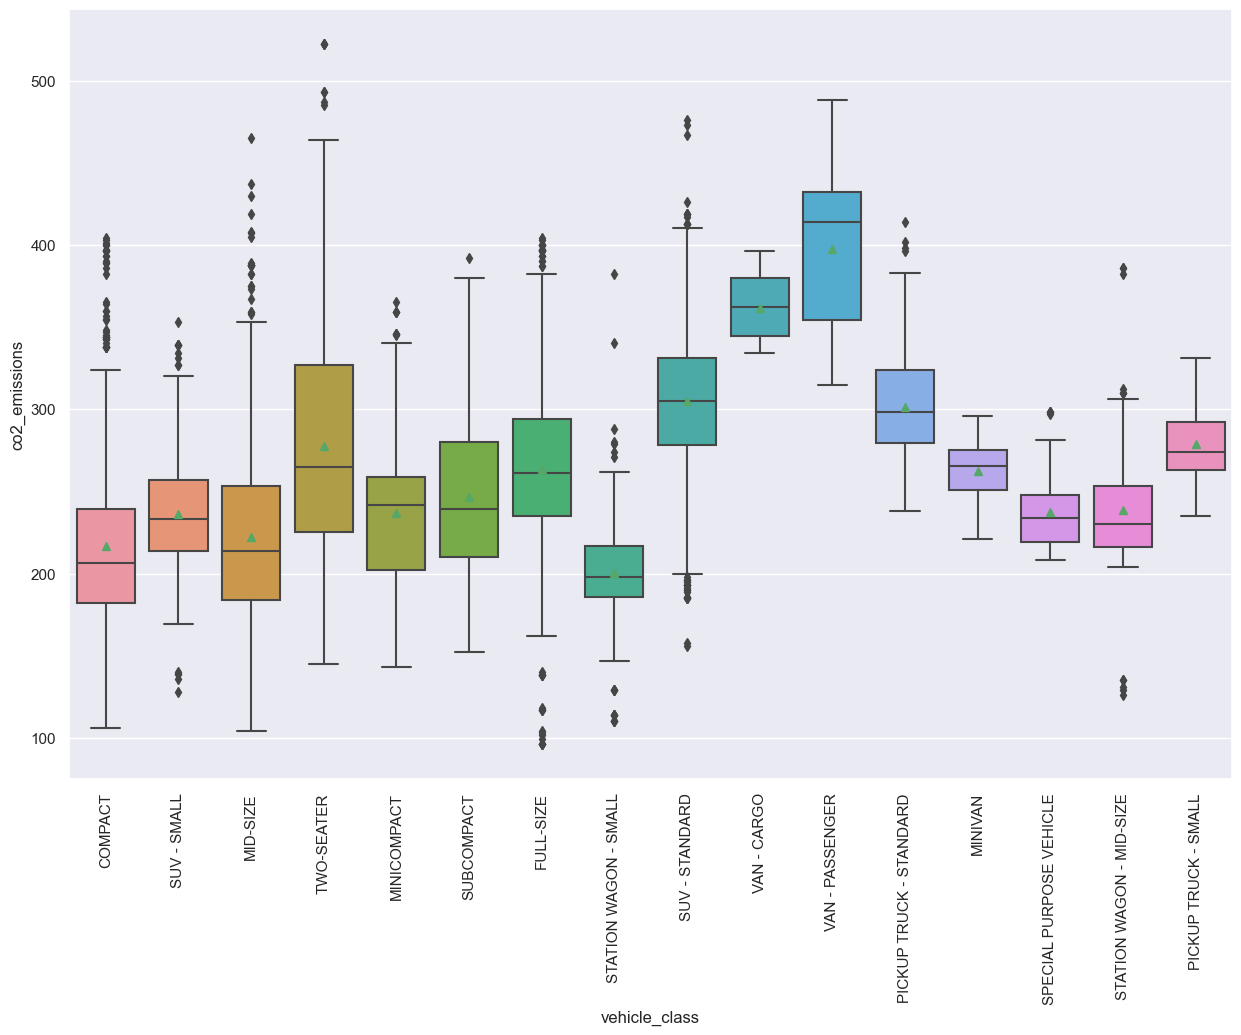

In [61]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(x="vehicle_class", y="co2_emissions", data=df,showmeans=True)

In [62]:
df.head()

make       model vehicle_class  engine_size  cylinders transmission  \
0  ACURA         ILX       COMPACT          2.0          4           AS   
1  ACURA         ILX       COMPACT          2.4          4            M   
2  ACURA  ILX HYBRID       COMPACT          1.5          4           AV   
3  ACURA     MDX 4WD   SUV - SMALL          3.5          6           AS   
4  ACURA     RDX AWD   SUV - SMALL          3.5          6           AS   

  fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0         Z                    9.9                   6.7   
1         Z                   11.2                   7.7   
2         Z                    6.0                   5.8   
3         Z                   12.7                   9.1   
4         Z                   12.1                   8.7   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  
0                             8.5                          33            196  
1                             9.6                          29            221  
2                             5.9                          48            136  
3                            11.1                          25            255  
4                            10.6                          27            244

<Axes: xlabel='vehicle_class', ylabel='co2_emissions'>

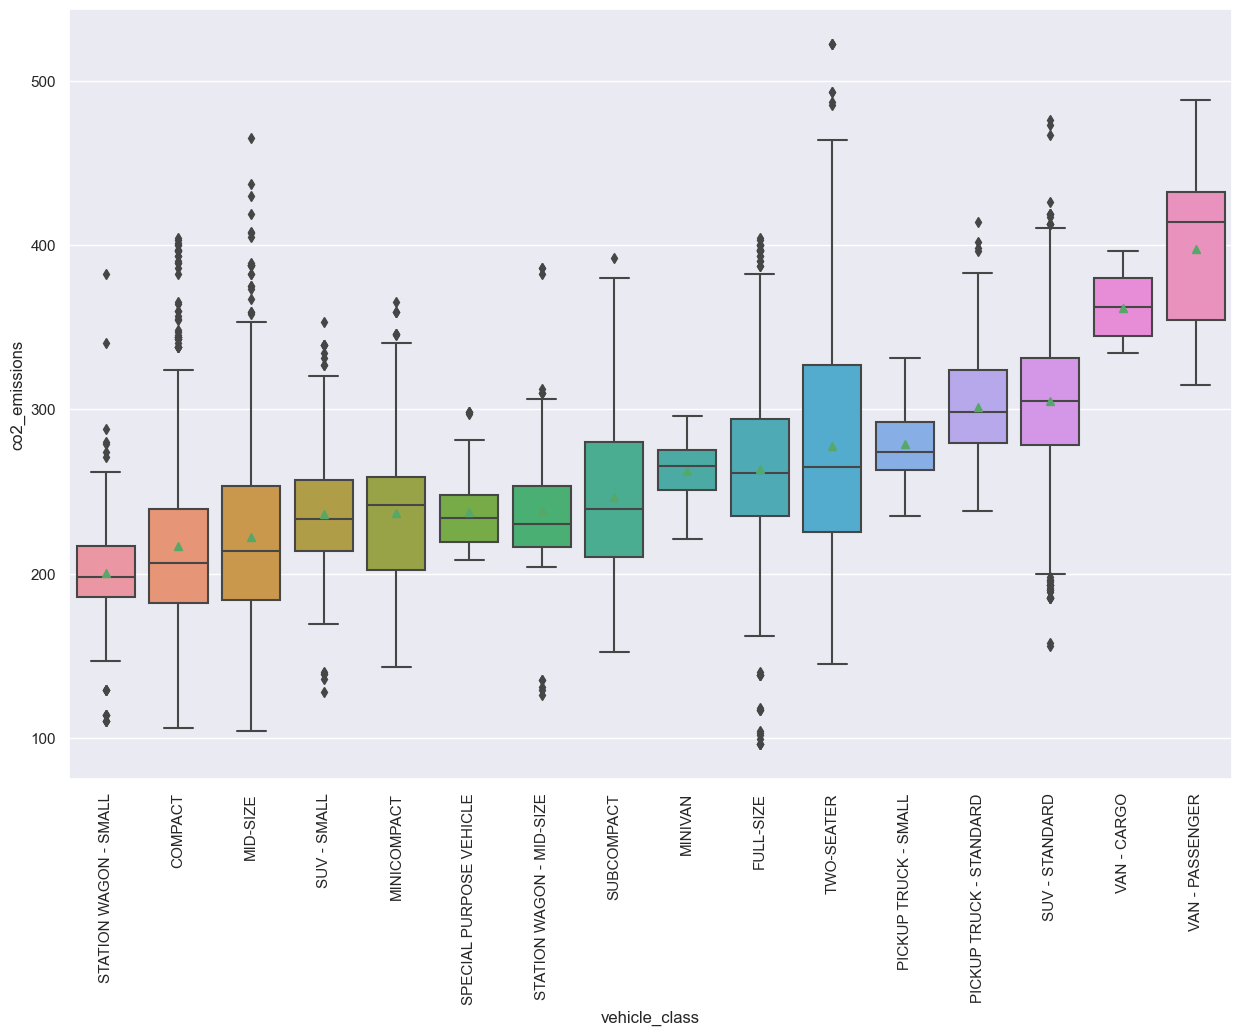

In [63]:
sorted = df[["vehicle_class","co2_emissions"]].groupby("vehicle_class").mean()
sorted = sorted.sort_values("co2_emissions")
sorted_index = sorted.index
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(x="vehicle_class", y="co2_emissions", data=df,showmeans=True, order=sorted_index)

In [64]:
df.columns = [col.replace('fuel_consumption_comb(l/100km)', 'fuel_consumption_comb_litres')for col in df.columns]
df

make        model   vehicle_class  engine_size  cylinders transmission  \
0     ACURA          ILX         COMPACT          2.0          4           AS   
1     ACURA          ILX         COMPACT          2.4          4            M   
2     ACURA   ILX HYBRID         COMPACT          1.5          4           AV   
3     ACURA      MDX 4WD     SUV - SMALL          3.5          6           AS   
4     ACURA      RDX AWD     SUV - SMALL          3.5          6           AS   
...     ...          ...             ...          ...        ...          ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL          2.0          4           AS   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL          2.0          4           AS   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL          2.0          4           AS   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD          2.0          4           AS   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD          2.0          4           AS   

     fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0            Z                    9.9                   6.7   
1            Z                   11.2                   7.7   
2            Z                    6.0                   5.8   
3            Z                   12.7                   9.1   
4            Z                   12.1                   8.7   
...        ...                    ...                   ...   
7380         Z                   10.7                   7.7   
7381         Z                   11.2                   8.3   
7382         Z                   11.7                   8.6   
7383         Z                   11.2                   8.3   
7384         Z                   12.2                   8.7   

      fuel_consumption_comb_litres  fuel_consumption_comb(mpg)  co2_emissions  
0                              8.5                          33            196  
1                              9.6                          29            221  
2                              5.9                          48            136  
3                             11.1                          25            255  
4                             10.6                          27            244  
...                            ...                         ...            ...  
7380                           9.4                          30            219  
7381                           9.9                          29            232  
7382                          10.3                          27            240  
7383                           9.9                          29            232  
7384                          10.7                          26            248  

[7385 rows x 12 columns]

Vehicle Class Vs Combined City & Highway Fuel Consumption

<Axes: xlabel='vehicle_class', ylabel='fuel_consumption_comb_litres'>

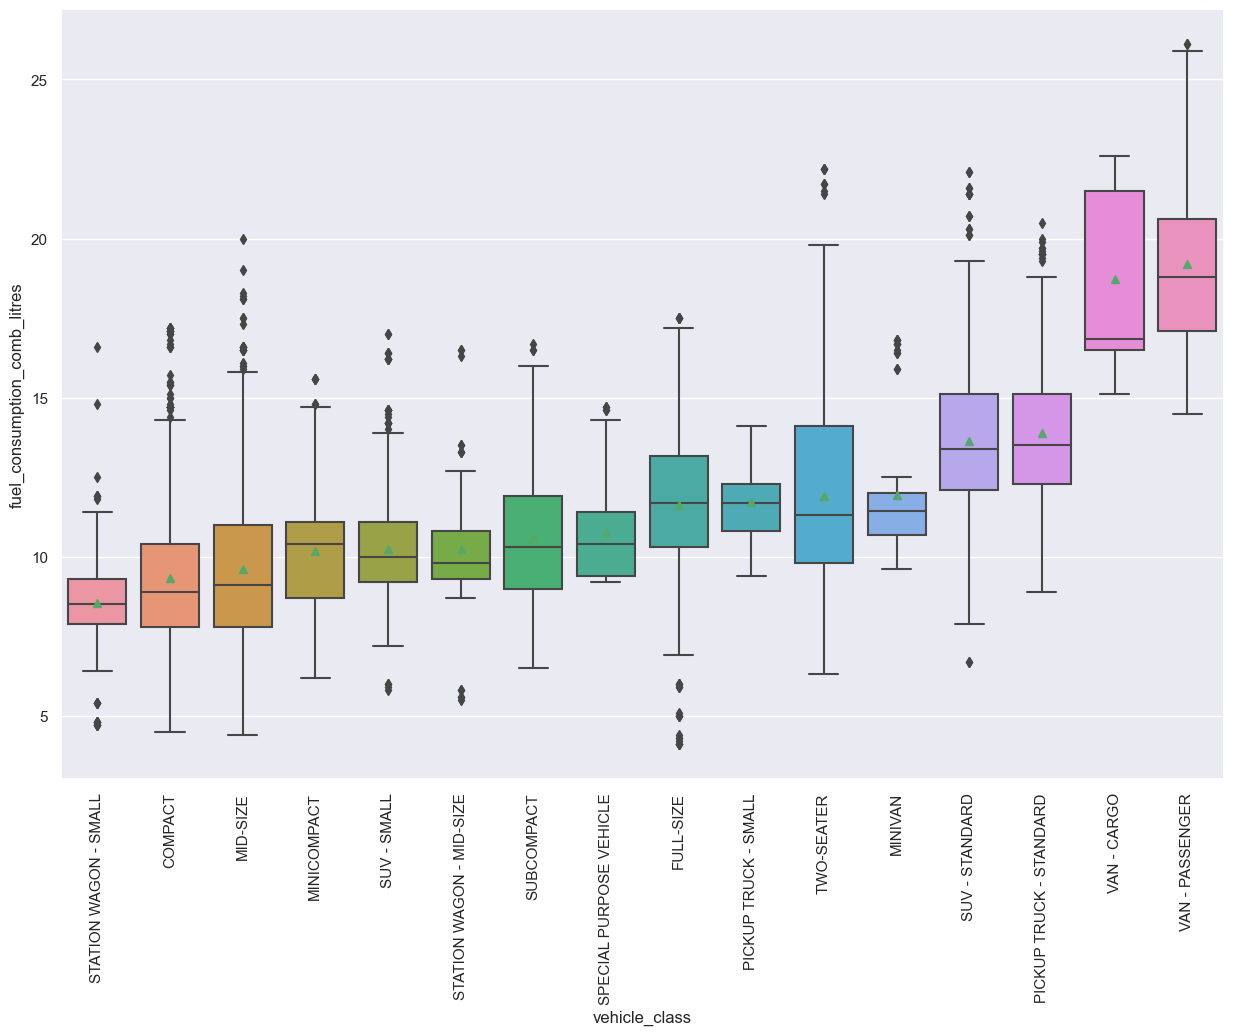

In [65]:
sorted = df[["vehicle_class","fuel_consumption_comb_litres"]].groupby("vehicle_class").mean()
sorted = sorted.sort_values("fuel_consumption_comb_litres")
sorted_index = sorted.index
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(x="vehicle_class", y="fuel_consumption_comb_litres", data=df, showmeans=True, order=sorted_index)

ANOVA: Analysis of Variance
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA can be used to find the correlation between different groups of a categorical variable.

ANOVA returns two parameters:

1.F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. The F-test calculates the ratio of variation between groups means over the variation within each of the sample group means. A larger score means there is a larger difference between the means.

2.P-value: P-value tells how statistically significant is our calculated score value. If the emission variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value. Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.

Cylinders Vs CO2 Emissions

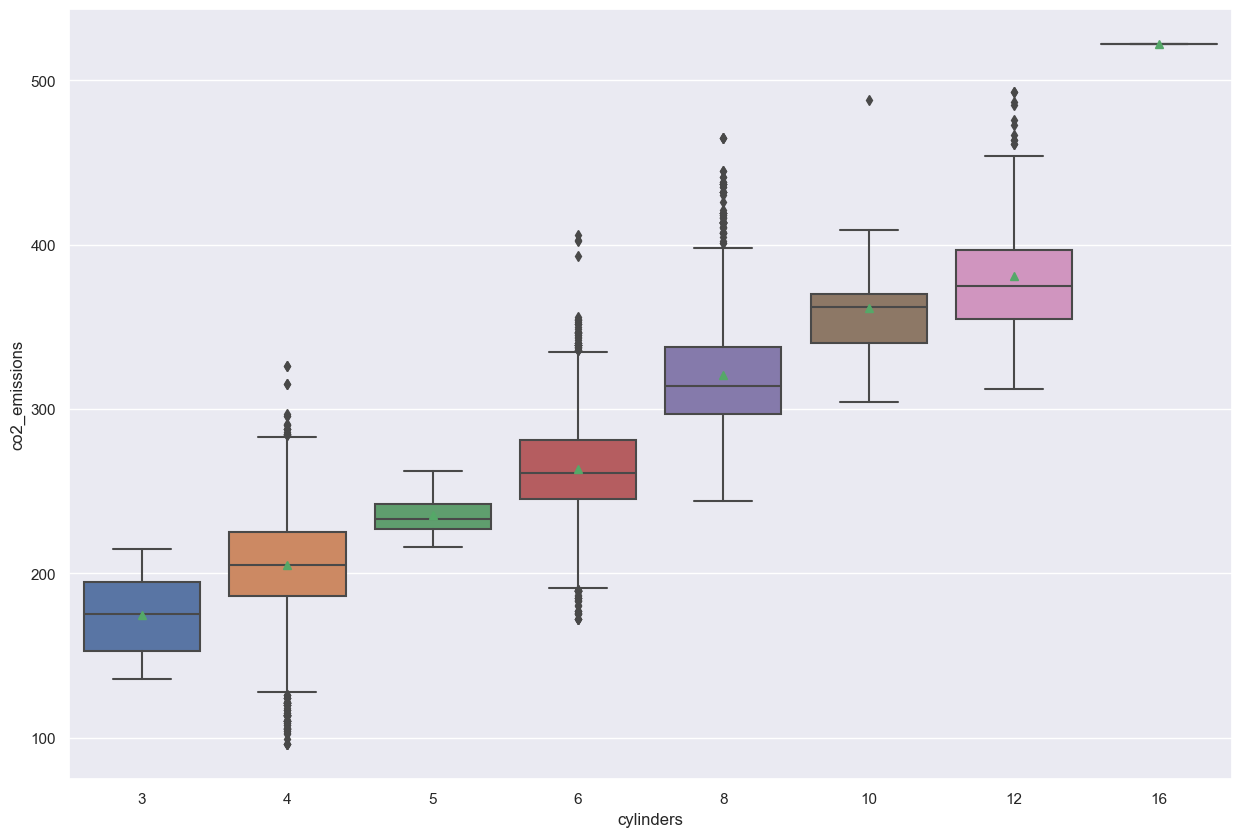

In [66]:
plt.figure(figsize=(15,10))
sns.boxplot(x="cylinders", y="co2_emissions", data=df,showmeans=True);

In [67]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df["co2_emissions"][df['cylinders']== 3],
               df["co2_emissions"][df['cylinders']== 4],
               df["co2_emissions"][df['cylinders'] == 5],
               df["co2_emissions"][df['cylinders']== 6],
               df["co2_emissions"][df['cylinders']== 8],
               df["co2_emissions"][df['cylinders']== 10],
               df["co2_emissions"][df['cylinders']== 12],
               df["co2_emissions"][df['cylinders']== 16])

F_onewayResult(statistic=2540.6681772525258, pvalue=0.0)

A large F test score in CO2 Emissions vs Cylinders showing a strong correlation and a P value of almost 0 implying almost certain statistical significance

In [68]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df["co2_emissions"][df['cylinders'] == 3],
               df['co2_emissions'][df['cylinders'] == 16])

F_onewayResult(statistic=691.8419043377287, pvalue=1.1408283030449698e-45)

In [69]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['co2_emissions'][df['cylinders'] == 6],
               df['co2_emissions'][df['cylinders'] == 8])

F_onewayResult(statistic=2870.002229687892, pvalue=0.0)

Fuel Type Vs CO2 Emissions

<Axes: xlabel='fuel_type', ylabel='co2_emissions'>

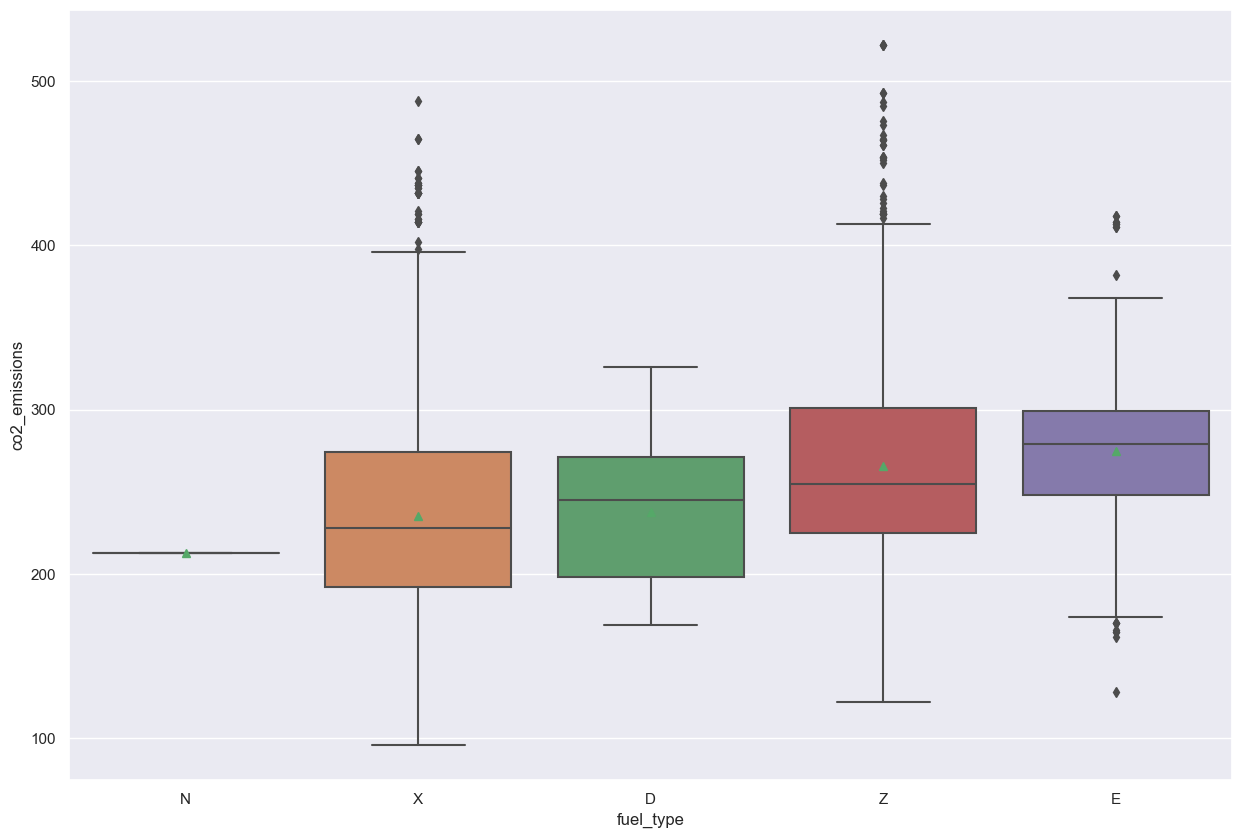

In [70]:
sorted = df[["fuel_type","co2_emissions"]].groupby("fuel_type").mean()
sorted = sorted.sort_values("co2_emissions")
sorted_index = sorted.index
plt.figure(figsize=(15,10))
sns.boxplot(x="fuel_type", y="co2_emissions", data=df,showmeans=True, order=sorted_index)

In [71]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['co2_emissions'][df['fuel_type'] == 'X'],
               df['co2_emissions'][df['fuel_type'] == 'D'],
               df['co2_emissions'][df['fuel_type'] == 'Z'],
               df['co2_emissions'][df['fuel_type'] == 'E'])

F_onewayResult(statistic=198.44550602223688, pvalue=8.858263862102743e-124)

In [72]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['co2_emissions'][df['fuel_type'] == 'X'],
               df['co2_emissions'][df['fuel_type'] == 'E'])

F_onewayResult(statistic=167.9135264181521, pvalue=1.1951413264948104e-37)

In [73]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['co2_emissions'][df['fuel_type'] == 'D'],
               df['co2_emissions'][df['fuel_type'] == 'Z'])

F_onewayResult(statistic=42.92276843204626, pvalue=6.560493410233929e-11)

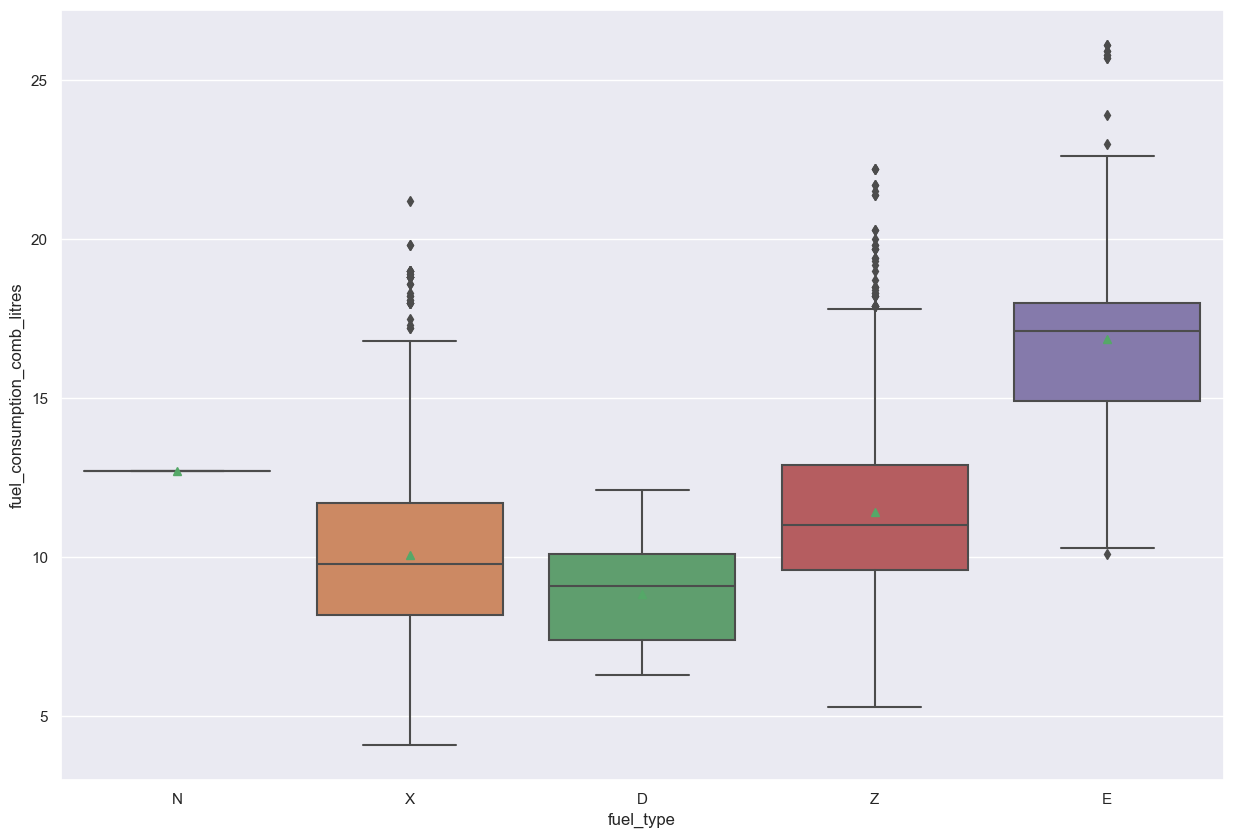

In [74]:
plt.figure(figsize=(15,10))
sns.boxplot(x="fuel_type", y="fuel_consumption_comb_litres", data=df,showmeans=True, order=sorted_index);

In [75]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['fuel_consumption_comb_litres'][df['fuel_type'] == 'X'],
               df['fuel_consumption_comb_litres'][df['fuel_type'] == 'D'],
               df['fuel_consumption_comb_litres'][df['fuel_type'] == 'Z'],
               df['fuel_consumption_comb_litres'][df['fuel_type'] == 'E'])

F_onewayResult(statistic=945.1546089048369, pvalue=0.0)

In [76]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['fuel_consumption_comb_litres'][df['fuel_type'] == 'X'],
               df['fuel_consumption_comb_litres'][df['fuel_type'] == 'E'])

F_onewayResult(statistic=2450.799232538687, pvalue=0.0)

In [77]:
#VIF Value
numerical_features=['engine_size','cylinders','fuel_consumption_city','fuel_consumption_hwy','fuel_consumption_comb_litres','fuel_consumption_comb(mpg)']

numericals=df[numerical_features]
scaled_numerical=StandardScaler().fit_transform(numericals)

vif_data = pd.DataFrame()
vif_data["feature"] = numericals.columns
vif_data["VIF"] = [variance_inflation_factor(scaled_numerical, i) for i in range(scaled_numerical.shape[1])]
print(vif_data)

                        feature          VIF
0                   engine_size     8.534424
1                     cylinders     7.612067
2         fuel_consumption_city  2060.091578
3          fuel_consumption_hwy   566.589522
4  fuel_consumption_comb_litres  4633.564995
5    fuel_consumption_comb(mpg)     7.249457


### If VIF value is greater than 10 then drop the column.

**fuel_consumption_comb_litres value is high drop this column**

In [78]:
data=df.drop(columns=['fuel_consumption_comb_litres'])
numerical_features=['engine_size','cylinders','fuel_consumption_city','fuel_consumption_hwy','fuel_consumption_comb(mpg)']

numericals=df[numerical_features]
scaled_numerical=StandardScaler().fit_transform(numericals)

vif_data = pd.DataFrame()
vif_data["feature"] = numericals.columns
vif_data["VIF"] = [variance_inflation_factor(scaled_numerical, i) for i in range(scaled_numerical.shape[1])]
print(vif_data)

                      feature        VIF
0                 engine_size   8.532104
1                   cylinders   7.611448
2       fuel_consumption_city  20.103197
3        fuel_consumption_hwy  10.549163
4  fuel_consumption_comb(mpg)   7.236872


**fuel_consumption_comb_city value is high drop this column**

In [79]:
data=df.drop(columns=['fuel_consumption_city'])
numerical_features=['engine_size','cylinders','fuel_consumption_hwy','fuel_consumption_comb(mpg)']

numericals=df[numerical_features]
scaled_numerical=StandardScaler().fit_transform(numericals)

vif_data = pd.DataFrame()
vif_data["feature"] = numericals.columns
vif_data["VIF"] = [variance_inflation_factor(scaled_numerical, i) for i in range(scaled_numerical.shape[1])]
print(vif_data)

                      feature       VIF
0                 engine_size  8.431099
1                   cylinders  7.205507
2        fuel_consumption_hwy  5.288430
3  fuel_consumption_comb(mpg)  5.235601


In [80]:
df_dummies = pd.get_dummies(data = data[["fuel_type","transmission","make","vehicle_class"]], drop_first = True)

df_num_features=data.select_dtypes(include=np.number)

df_comb = pd.concat([df_num_features, df_dummies], axis = 1)

In [81]:
df_comb.head()

engine_size  cylinders  fuel_consumption_hwy  fuel_consumption_comb_litres  \
0          2.0          4                   6.7                           8.5   
1          2.4          4                   7.7                           9.6   
2          1.5          4                   5.8                           5.9   
3          3.5          6                   9.1                          11.1   
4          3.5          6                   8.7                          10.6   

   fuel_consumption_comb(mpg)  co2_emissions  fuel_type_E  fuel_type_N  \
0                          33            196            0            0   
1                          29            221            0            0   
2                          48            136            0            0   
3                          25            255            0            0   
4                          27            244            0            0   

   fuel_type_X  fuel_type_Z  ...  vehicle_class_PICKUP TRUCK - STANDARD  \
0            0            1  ...                                      0   
1            0            1  ...                                      0   
2            0            1  ...                                      0   
3            0            1  ...                                      0   
4            0            1  ...                                      0   

   vehicle_class_SPECIAL PURPOSE VEHICLE  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   vehicle_class_STATION WAGON - MID-SIZE  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   vehicle_class_STATION WAGON - SMALL  vehicle_class_SUBCOMPACT  \
0                                    0                         0   
1                                    0                         0   
2                                    0                         0   
3                                    0                         0   
4                                    0                         0   

   vehicle_class_SUV - SMALL  vehicle_class_SUV - STANDARD  \
0                          0                             0   
1                          0                             0   
2                          0                             0   
3                          1                             0   
4                          1                             0   

   vehicle_class_TWO-SEATER  vehicle_class_VAN - CARGO  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   vehicle_class_VAN - PASSENGER  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  

[5 rows x 70 columns]

# Multiple Linear Regression Models

In [82]:
X = df_comb.drop(['co2_emissions'], axis=1)
y = df_comb['co2_emissions']

In [83]:
X = sm.add_constant(X)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [85]:
MLR_model1 = sm.OLS(y_train, X_train).fit()
MLR_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          co2_emissions   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.188e+04
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:14:34   Log-Likelihood:                -15213.
No. Observations:                5169   AIC:                         3.057e+04
Df Residuals:                    5099   BIC:                         3.102e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     81.0339      2.025     40.024      0.000      77.065      85.003
engine_size                                0.4321      0.185      2.334      0.020       0.069       0.795
cylinders                                  0.9398      0.131      7.177      0.000       0.683       1.197
fuel_consumption_hwy                       0.6097      0.212      2.870      0.004       0.193       1.026
fuel_consumption_comb_litres              19.3091      0.212     90.881      0.000      18.893      19.726
fuel_consumption_comb(mpg)                -0.8708      0.033    -26.419      0.000      -0.935      -0.806
fuel_type_E                             -137.6034      0.708   -194.430      0.000    -138.991    -136.216
fuel_type_N                             -111.7907      4.664    -23.969      0.000    -120.934    -102.647
fuel_type_X                              -30.7392      0.480    -64.033      0.000     -31.680     -29.798
fuel_type_Z                              -29.2647      0.506    -57.827      0.000     -30.257     -28.273
transmission_AM                            1.7922      0.344      5.208      0.000       1.118       2.467
transmission_AS                            0.6633      0.239      2.777      0.006       0.195       1.132
transmission_AV                            0.8954      0.399      2.245      0.025       0.113       1.677
transmission_M                             0.5281      0.267      1.979      0.048       0.005       1.051
make_ALFA ROMEO                            3.8578      1.206      3.198      0.001       1.493       6.222
make_ASTON MARTIN                          4.3575      1.126      3.870      0.000       2.150       6.565
make_AUDI                                  1.8384      0.753      2.442      0.015       0.362       3.314
make_BENTLEY                               6.9103      1.113      6.209      0.000       4.729       9.092
make_BMW                                   1.6373      0.710      2.308      0.021       0.246       3.028
make_BUGATTI                              22.7481      3.475      6.547      0.000      15.936      29.560
make_BUICK                                 3.8237      0.867      4.408      0.000       2.123       5.524
make_CADILLAC                              2.7549      0.810      3.400      0.001       1.166       4.343
make_CHEVROLET                             4.2393      0.749      5.658      0.000       2.770       5.708
make_CHRYSLER                              6.7417      0.985      6.847      0.000       4.811       8.672
make_DODGE                                 5.1034      0.815      6.262      0.000       3.506       6.701
make_FIAT                                  4.1304      1.002      4.121      0.000     

In [86]:
df_num_features.skew()

engine_size                     0.809181
cylinders                       1.110415
fuel_consumption_hwy            1.079217
fuel_consumption_comb_litres    0.893316
fuel_consumption_comb(mpg)      0.977034
co2_emissions                   0.526094
dtype: float64

In [87]:
for col in df_num_features.columns:
    print("Column ", col, " :", stats.shapiro(df_num_features[col]))

Column  engine_size  : ShapiroResult(statistic=0.9186931848526001, pvalue=0.0)
Column  cylinders  : ShapiroResult(statistic=0.8053245544433594, pvalue=0.0)
Column  fuel_consumption_hwy  : ShapiroResult(statistic=0.9435973763465881, pvalue=0.0)
Column  fuel_consumption_comb_litres  : ShapiroResult(statistic=0.958915114402771, pvalue=2.1651462572282749e-41)
Column  fuel_consumption_comb(mpg)  : ShapiroResult(statistic=0.9543737769126892, pvalue=4.862505671207115e-43)
Column  co2_emissions  : ShapiroResult(statistic=0.9837979674339294, pvalue=3.157028661228278e-28)


In [88]:
df_num_features.drop('co2_emissions',axis=1,inplace=True)

In [89]:
mms = MinMaxScaler()
mmsfit = mms.fit(df_num_features)
dfx = pd.DataFrame(mms.fit_transform(df_num_features), columns = ['engine_size','cylinders',
                                                                'fuel_consumption_hwy','fuel_consumption_comb_litres','fuel_consumption_comb(mpg)'])

In [90]:
df = pd.concat([dfx, df_dummies], axis = 1)
df.head()

engine_size  cylinders  fuel_consumption_hwy  fuel_consumption_comb_litres  \
0     0.146667   0.076923              0.162651                      0.200000   
1     0.200000   0.076923              0.222892                      0.250000   
2     0.080000   0.076923              0.108434                      0.081818   
3     0.346667   0.230769              0.307229                      0.318182   
4     0.346667   0.230769              0.283133                      0.295455   

   fuel_consumption_comb(mpg)  fuel_type_E  fuel_type_N  fuel_type_X  \
0                    0.379310            0            0            0   
1                    0.310345            0            0            0   
2                    0.637931            0            0            0   
3                    0.241379            0            0            0   
4                    0.275862            0            0            0   

   fuel_type_Z  transmission_AM  ...  vehicle_class_PICKUP TRUCK - STANDARD  \
0            1                0  ...                                      0   
1            1                0  ...                                      0   
2            1                0  ...                                      0   
3            1                0  ...                                      0   
4            1                0  ...                                      0   

   vehicle_class_SPECIAL PURPOSE VEHICLE  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   vehicle_class_STATION WAGON - MID-SIZE  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   vehicle_class_STATION WAGON - SMALL  vehicle_class_SUBCOMPACT  \
0                                    0                         0   
1                                    0                         0   
2                                    0                         0   
3                                    0                         0   
4                                    0                         0   

   vehicle_class_SUV - SMALL  vehicle_class_SUV - STANDARD  \
0                          0                             0   
1                          0                             0   
2                          0                             0   
3                          1                             0   
4                          1                             0   

   vehicle_class_TWO-SEATER  vehicle_class_VAN - CARGO  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   vehicle_class_VAN - PASSENGER  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  

[5 rows x 69 columns]

In [91]:
X = df.copy()
X = sm.add_constant(X)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


MLR_model2 = sm.OLS(y_train, X_train).fit()
MLR_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          co2_emissions   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.188e+04
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:14:35   Log-Likelihood:                -15213.
No. Observations:                5169   AIC:                         3.057e+04
Df Residuals:                    5099   BIC:                         3.102e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                    156.2698      1.411    110.767      0.000     153.504     159.036
engine_size                                3.2406      1.388      2.334      0.020       0.519       5.963
cylinders                                 12.2175      1.702      7.177      0.000       8.880      15.555
fuel_consumption_hwy                      10.1217      3.526      2.870      0.004       3.208      17.035
fuel_consumption_comb_litres             424.7992      4.674     90.881      0.000     415.636     433.963
fuel_consumption_comb(mpg)               -50.5048      1.912    -26.419      0.000     -54.252     -46.757
fuel_type_E                             -137.6034      0.708   -194.430      0.000    -138.991    -136.216
fuel_type_N                             -111.7907      4.664    -23.969      0.000    -120.934    -102.647
fuel_type_X                              -30.7392      0.480    -64.033      0.000     -31.680     -29.798
fuel_type_Z                              -29.2647      0.506    -57.827      0.000     -30.257     -28.273
transmission_AM                            1.7922      0.344      5.208      0.000       1.118       2.467
transmission_AS                            0.6633      0.239      2.777      0.006       0.195       1.132
transmission_AV                            0.8954      0.399      2.245      0.025       0.113       1.677
transmission_M                             0.5281      0.267      1.979      0.048       0.005       1.051
make_ALFA ROMEO                            3.8578      1.206      3.198      0.001       1.493       6.222
make_ASTON MARTIN                          4.3575      1.126      3.870      0.000       2.150       6.565
make_AUDI                                  1.8384      0.753      2.442      0.015       0.362       3.314
make_BENTLEY                               6.9103      1.113      6.209      0.000       4.729       9.092
make_BMW                                   1.6373      0.710      2.308      0.021       0.246       3.028
make_BUGATTI                              22.7481      3.475      6.547      0.000      15.936      29.560
make_BUICK                                 3.8237      0.867      4.408      0.000       2.123       5.524
make_CADILLAC                              2.7549      0.810      3.400      0.001       1.166       4.343
make_CHEVROLET                             4.2393      0.749      5.658      0.000       2.770       5.708
make_CHRYSLER                              6.7417      0.985      6.847      0.000       4.811       8.672
make_DODGE                                 5.1034      0.815      6.262      0.000       3.506       6.701
make_FIAT                                  4.1304      1.002      4.121      0.000     

In [93]:
target = df_comb['co2_emissions']
target.dtype

dtype('int64')

In [94]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_num_features.values, i) for i in range(df_num_features.shape[1])]
vif["Features"] = df_num_features.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

VIF_Factor                      Features
0  538.399325  fuel_consumption_comb_litres
1  461.167654          fuel_consumption_hwy
2   79.123287                     cylinders
3   54.496523                   engine_size
4    7.024147    fuel_consumption_comb(mpg)

In [106]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [108]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
linreg = LinearRegression()
linreg_forward = sfs(estimator=linreg, k_features ='best', forward=True,
                     verbose=0, scoring='r2')

sfs_forward = linreg_forward.fit(X_train, y_train)

In [109]:
print('Features selected using forward selection are: ')
print(sfs_forward.k_feature_names_)

print('\nR-Squared: ', sfs_forward.k_score_)

Features selected using forward selection are: 
('engine_size', 'cylinders', 'fuel_consumption_hwy', 'fuel_consumption_comb_litres', 'fuel_consumption_comb(mpg)', 'fuel_type_E', 'fuel_type_N', 'fuel_type_X', 'fuel_type_Z', 'transmission_AM', 'make_AUDI', 'make_BENTLEY', 'make_BMW', 'make_BUGATTI', 'make_CHRYSLER', 'make_DODGE', 'make_FORD', 'make_GENESIS', 'make_HYUNDAI', 'make_INFINITI', 'make_JAGUAR', 'make_JEEP', 'make_KIA', 'make_LAMBORGHINI', 'make_LEXUS', 'make_LINCOLN', 'make_MASERATI', 'make_MAZDA', 'make_MINI', 'make_MITSUBISHI', 'make_PORSCHE', 'make_RAM', 'make_ROLLS-ROYCE', 'make_SCION', 'make_SRT', 'make_SUBARU', 'make_VOLKSWAGEN', 'make_VOLVO', 'vehicle_class_FULL-SIZE', 'vehicle_class_MINICOMPACT', 'vehicle_class_PICKUP TRUCK - SMALL', 'vehicle_class_PICKUP TRUCK - STANDARD', 'vehicle_class_SUBCOMPACT', 'vehicle_class_SUV - SMALL', 'vehicle_class_SUV - STANDARD', 'vehicle_class_TWO-SEATER', 'vehicle_class_VAN - CARGO', 'vehicle_class_VAN - PASSENGER')

R-Squared:  0.9928

In [175]:
linreg = LinearRegression()
linreg_backward = sfs(estimator = linreg, k_features ='best', forward = False,
                     verbose = 0, scoring = 'r2')

sfs_backward = linreg_backward.fit(X_train, y_train)

In [176]:
print('Features selected using backward elimination are: ')
print(sfs_backward.k_feature_names_)

print('\nR-Squared: ', sfs_backward.k_score_)

Features selected using backward elimination are: 
('engine_size', 'cylinders', 'fuel_consumption_hwy', 'fuel_consumption_comb_litres', 'fuel_consumption_comb(mpg)', 'fuel_type_E', 'fuel_type_X', 'fuel_type_Z', 'transmission_AM', 'make_ALFA ROMEO', 'make_ASTON MARTIN', 'make_BENTLEY', 'make_BUGATTI', 'make_BUICK', 'make_CHEVROLET', 'make_CHRYSLER', 'make_DODGE', 'make_FIAT', 'make_FORD', 'make_GENESIS', 'make_GMC', 'make_HONDA', 'make_HYUNDAI', 'make_JEEP', 'make_KIA', 'make_LAMBORGHINI', 'make_LINCOLN', 'make_MASERATI', 'make_MAZDA', 'make_MERCEDES-BENZ', 'make_NISSAN', 'make_RAM', 'make_ROLLS-ROYCE', 'make_SUBARU', 'make_TOYOTA', 'vehicle_class_FULL-SIZE', 'vehicle_class_MINICOMPACT', 'vehicle_class_PICKUP TRUCK - SMALL', 'vehicle_class_PICKUP TRUCK - STANDARD', 'vehicle_class_SUBCOMPACT', 'vehicle_class_SUV - SMALL', 'vehicle_class_SUV - STANDARD', 'vehicle_class_VAN - CARGO', 'vehicle_class_VAN - PASSENGER')

R-Squared:  0.9928330246030914


In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

MLR_full_model = sm.OLS(y_train, X_train).fit()
MLR_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          co2_emissions   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.188e+04
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:02:59   Log-Likelihood:                -15213.
No. Observations:                5169   AIC:                         3.057e+04
Df Residuals:                    5099   BIC:                         3.102e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                    156.2698      1.411    110.767      0.000     153.504     159.036
engine_size                                3.2406      1.388      2.334      0.020       0.519       5.963
cylinders                                 12.2175      1.702      7.177      0.000       8.880      15.555
fuel_consumption_hwy                      10.1217      3.526      2.870      0.004       3.208      17.035
fuel_consumption_comb_litres             424.7992      4.674     90.881      0.000     415.636     433.963
fuel_consumption_comb(mpg)               -50.5048      1.912    -26.419      0.000     -54.252     -46.757
fuel_type_E                             -137.6034      0.708   -194.430      0.000    -138.991    -136.216
fuel_type_N                             -111.7907      4.664    -23.969      0.000    -120.934    -102.647
fuel_type_X                              -30.7392      0.480    -64.033      0.000     -31.680     -29.798
fuel_type_Z                              -29.2647      0.506    -57.827      0.000     -30.257     -28.273
transmission_AM                            1.7922      0.344      5.208      0.000       1.118       2.467
transmission_AS                            0.6633      0.239      2.777      0.006       0.195       1.132
transmission_AV                            0.8954      0.399      2.245      0.025       0.113       1.677
transmission_M                             0.5281      0.267      1.979      0.048       0.005       1.051
make_ALFA ROMEO                            3.8578      1.206      3.198      0.001       1.493       6.222
make_ASTON MARTIN                          4.3575      1.126      3.870      0.000       2.150       6.565
make_AUDI                                  1.8384      0.753      2.442      0.015       0.362       3.314
make_BENTLEY                               6.9103      1.113      6.209      0.000       4.729       9.092
make_BMW                                   1.6373      0.710      2.308      0.021       0.246       3.028
make_BUGATTI                              22.7481      3.475      6.547      0.000      15.936      29.560
make_BUICK                                 3.8237      0.867      4.408      0.000       2.123       5.524
make_CADILLAC                              2.7549      0.810      3.400      0.001       1.166       4.343
make_CHEVROLET                             4.2393      0.749      5.658      0.000       2.770       5.708
make_CHRYSLER                              6.7417      0.985      6.847      0.000       4.811       8.672
make_DODGE                                 5.1034      0.815      6.262      0.000       3.506       6.701
make_FIAT                                  4.1304      1.002      4.121      0.000     

In [178]:
name = ['f-value','p-value']
test = sms.het_breuschpagan(MLR_full_model.resid, MLR_full_model.model.exog)
lzip(name, test[2:])

[('f-value', 42.48983868295881), ('p-value', 0.0)]

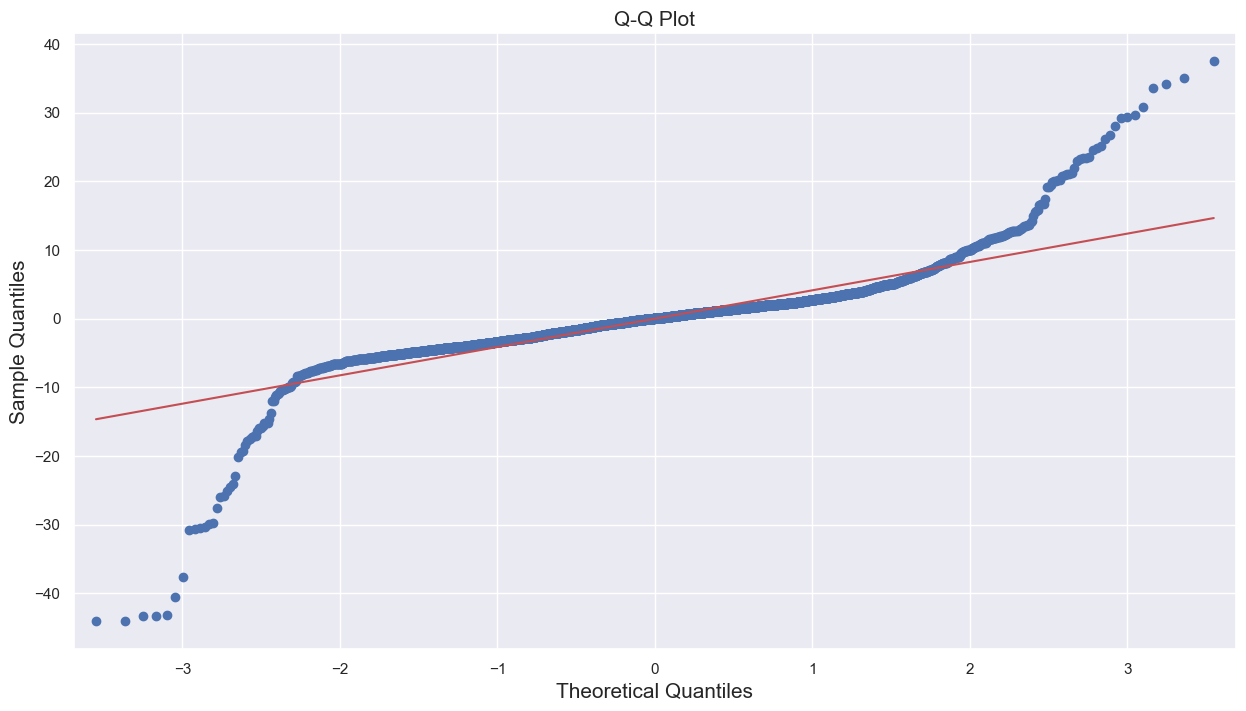

In [179]:
plt.rcParams['figure.figsize'] = [15,8]

qqplot(MLR_full_model.resid, line = 'r')

plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

plt.show()

In [180]:
stat, p_value = shapiro(MLR_full_model.resid)
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.8086544275283813
P-Value: 0.0


In [181]:
y_train_pred = MLR_full_model.predict(X_train)
y_train_pred.head()

5177    238.921029
5906    163.260485
1273    237.564311
2195    265.984231
87      234.395525
dtype: float64

In [182]:
ssr = np.sum((y_train_pred - y_train.mean())**2)
sse = np.sum((y_train - y_train_pred)**2)
sst = np.sum((y_train - y_train.mean())**2)


print('Sum of Squared Regression:',ssr)
print('Sum of Squared Error:',sse)
print('Sum of Sqaured Total:',sst)
print('Sum of SSR and SSE is:',ssr+sse)

Sum of Squared Regression: 17513971.280277807
Sum of Squared Error: 108960.768474399
Sum of Sqaured Total: 17622932.048752174
Sum of SSR and SSE is: 17622932.048752207


In [183]:
r_sq =MLR_full_model.rsquared

# print the R-squared value
print('R Squared is:',r_sq)

R Squared is: 0.9938171032962637


In [184]:
see = np.sqrt(sse/(len(X_train) - 2))
print("The standard error of estimate:",see)

The standard error of estimate: 4.592147699116089


In [185]:
t_intercept =MLR_full_model.params[0] / MLR_full_model.bse[0]
print('t intercept:',t_intercept)

t intercept: 110.76685378075501


In [186]:
t_coeff1 =MLR_full_model.params[1] / MLR_full_model.bse[1]
print('t coeff:',t_coeff1)

t coeff: 2.333947323044482


In [187]:
pval = stats.t.sf(np.abs(t_intercept), 4069)*2
print('p val for intercept:',pval)

p val for intercept: 0.0


In [188]:
CI_inter_min, CI_inter_max = MLR_full_model.params[0] - (1.9622*MLR_full_model.bse[0]), MLR_full_model.params[0] + (1.9622*MLR_full_model.bse[0])
print('CI for intercept:', [CI_inter_min , CI_inter_max])

CI for intercept: [153.50148556718153, 159.03802475946372]


In [189]:
CI_coeff1_min, CI_coeff1_max = MLR_full_model.params[1] - (1.9622*MLR_full_model.bse[1]), MLR_full_model.params[1] + (1.9622*MLR_full_model.bse[1])
print('CI for coeff1:', [CI_coeff1_min, CI_coeff1_max])

CI for coeff1: [0.5161533725208844, 5.964995017248972]


In [190]:
r_sq_mlr = MLR_full_model.rsquared
print('r square in regression model:',r_sq_mlr)

r square in regression model: 0.9938171032962637


In [191]:
adj_r_sq = MLR_full_model.rsquared_adj
print('Adjusted r square for regression model:',adj_r_sq)

Adjusted r square for regression model: 0.9937334359354953


In [192]:
k = len(X_train.columns)
n = len(X_train)

f_value = (r_sq_mlr / (k - 1))/((1-r_sq_mlr)/(n - k))
print('f value for regression model:',f_value)

f value for regression model: 11878.19352934865


In [193]:
p_val = stats.f.sf(f_value, dfn = 31, dfd = 4364)
print('p value for regression model:',p_val)

p value for regression model: 0.0


In [194]:
train_pred = MLR_full_model.predict(X_train)
test_pred = MLR_full_model.predict(X_test)

In [195]:
mse_train = round(mean_squared_error(y_train, train_pred),4)
mse_test = round(mean_squared_error(y_test, test_pred),4)

print("Mean Squared Error (MSE) on training set: ", mse_train)
print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  21.0797
Mean Squared Error (MSE) on test set:  24.6189


In [196]:
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)

mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)

print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  4.5913
Root Mean Squared Error (RMSE) on test set:  4.9617


In [197]:
mae_train = round(mean_absolute_error(y_train, train_pred),4)
mae_test = round(mean_absolute_error(y_test, test_pred),4)

print("Mean Absolute Error (MAE) on training set: ", mae_train)
print("Mean Absolute Error (MAE) on test set: ", mae_test)

Mean Absolute Error (MAE) on training set:  2.857
Mean Absolute Error (MAE) on test set:  3.0217


In [198]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

In [199]:
mape_train = round(mape(y_train, train_pred),4)
mape_test = round(mape(y_test, test_pred),4)

print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on training set:  1.1591
Mean Absolute Percentage Error (MAPE) on test set:  1.2425


In [200]:
cols = ['Model_Name', 'R-squared', 'Adj. R-squared', 'MSE', 'RMSE', 'MAE', 'MAPE']

result_table = pd.DataFrame(columns = cols)

MLR_full_model_metrics = pd.Series({'Model_Name': "MLR Full Model",
                     'R-squared': MLR_full_model.rsquared,
                     'Adj. R-squared': MLR_full_model.rsquared_adj,
                     'MSE': mean_squared_error(y_test, test_pred),
                     'RMSE': rmse(y_test, test_pred),
                     'MAE': mean_absolute_error(y_test, test_pred),
                     'MAPE': mape(y_test, test_pred)
                   })

result_table = result_table.append(MLR_full_model_metrics, ignore_index = True)

result_table

TypeError: 'numpy.float64' object is not callable

In [ ]:
sns.regplot(y = y_train,x = train_pred,color='red',line_kws={'color':'blue'},marker='x')
plt.show()

# **MODEL VALIDATION**

# Cross Validation

In [ ]:
kf = KFold(n_splits = 10)

def Get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)
    return model.score(X_test_k, y_test_k)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

In [ ]:
scores = []

for train_index, test_index in kf.split(X_train):
    X_train_k, X_test_k, y_train_k, y_test_k = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]

    scores.append(Get_score(LinearRegression(), X_train_k, X_test_k, y_train_k, y_test_k))


print('All scores: ', scores)
print("\nMinimum score obtained: ", round(min(scores), 4))
print("Maximum score obtained: ", round(max(scores), 4))
print("Average score obtained: ", round(np.mean(scores), 4))

In [ ]:
scores = cross_val_score(estimator = LinearRegression(),
                         X = X_train,
                         y = y_train,
                         cv = 10,
                         scoring = 'r2')

print('All scores: ', scores)
print("\nMinimum score obtained: ", round(min(scores), 4))
print("Maximum score obtained: ", round(max(scores), 4))
print("Average score obtained: ", round(np.mean(scores), 4))

**The R2 value is similar to the one obtained in the MLR model. There are no significant changes.**

# Leave Out One Cross Validation(LOOCV)

In [ ]:
def Get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)
    return model.score(X_test_k, y_test_k)

In [ ]:
loocv_rmse = []
loocv = LeaveOneOut()

for train_index, test_index in loocv.split(X_train):

    X_train_l, X_test_l, y_train_l, y_test_l = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]

    linreg = LinearRegression()
    linreg.fit(X_train_l, y_train_l)

    mse = mean_squared_error(y_test_l, linreg.predict(X_test_l))
    rmse = np.sqrt(mse)
    loocv_rmse.append(rmse)

In [ ]:
print("\nMinimum rmse obtained: ", round(min(loocv_rmse), 4))
print("Maximum rmse obtained: ", round(max(loocv_rmse), 4))
print("Average rmse obtained: ", round(np.mean(loocv_rmse), 4))

# GRADIENT DESCENT

In [ ]:
def get_train_rmse(model):

    train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, train_pred)
    rmse_train = round(np.sqrt(mse_train), 4)
    return(rmse_train)

def get_test_rmse(model):

    test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, test_pred)
    rmse_test = round(np.sqrt(mse_test), 4)
    return(rmse_test)

def get_test_mape(model):

    test_pred = model.predict(X_test)
    mape_test = mape(y_test, test_pred)
    return(mape_test)

def plot_coefficients(model, algorithm_name):

    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)
    plt.ylabel('Features', fontsize = 15)

def get_score(model):

    r_sq = model.score(X_train, y_train)
    n = X_train.shape[0]
    k = X_train.shape[1]
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    return ([r_sq, r_sq_adj])

In [ ]:
sgd = SGDRegressor(random_state = 10)
linreg_with_SGD = sgd.fit(X_train, y_train)

print('RMSE on train set:', get_train_rmse(linreg_with_SGD))
print('RMSE on test set:', get_test_rmse(linreg_with_SGD))

In [149]:
MLR_model = linreg.fit(X_train, y_train)

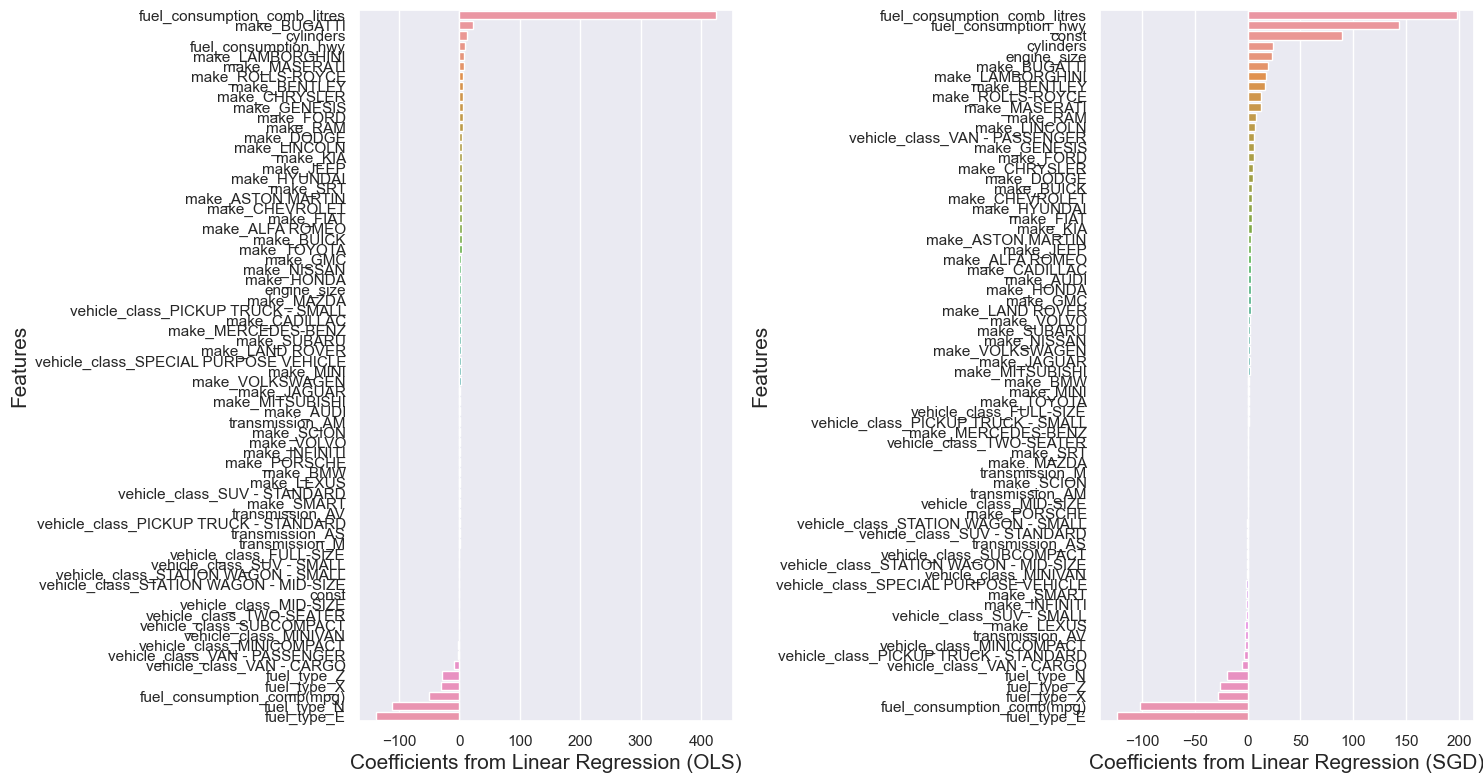

In [150]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(linreg_with_SGD, 'Linear Regression (SGD)')

plt.tight_layout()

In [151]:
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Train_RMSE','Test_RMSE', 'Test_MAPE'])

def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):

    global score_card
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha,
                       'l1-ratio': l1_ratio,
                       'Test_MAPE': get_test_mape(model),
                       'Train_RMSE': get_train_rmse(model),
                       'Test_RMSE': get_test_rmse(model),
                       'R-Squared': get_score(model)[0],
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

In [152]:
update_score_card(algorithm_name = 'Linear Regression (using SGD)', model = linreg_with_SGD)

score_card

Model_Name Alpha (Wherever Required) l1-ratio  \
0  Linear Regression (using SGD)                         -        -   

   R-Squared  Adj. R-Squared  Train_RMSE  Test_RMSE  Test_MAPE  
0   0.990345        0.990212      5.7374     5.8522   1.622013

# Regularization

Ridge Regression Model

In [153]:
ridge = Ridge(alpha = 0.1, max_iter = 500)
ridge.fit(X_train, y_train)

update_score_card(algorithm_name='Ridge Regression (with alpha = 0.1)', model = ridge, alpha = 0.1)

print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 4.9733


In [154]:
ridge = Ridge(alpha = 1, max_iter = 500)
ridge.fit(X_train, y_train)

update_score_card(algorithm_name='Ridge Regression (with alpha = 1)', model = ridge, alpha = 1)

print('RMSE on test set:', np.round(get_test_rmse(ridge),2))

RMSE on test set: 5.46


In [155]:
ridge = Ridge(alpha = 2, max_iter = 500)
ridge.fit(X_train, y_train)

update_score_card(algorithm_name='Ridge Regression (with alpha = 2)', model = ridge, alpha = 2)

print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 5.8742


In [156]:
ridge = Ridge(alpha = 0.5, max_iter = 500)
ridge.fit(X_train, y_train)

update_score_card(algorithm_name='Ridge Regression (with alpha = 0.5)', model = ridge, alpha = 0.5)

print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 5.1902


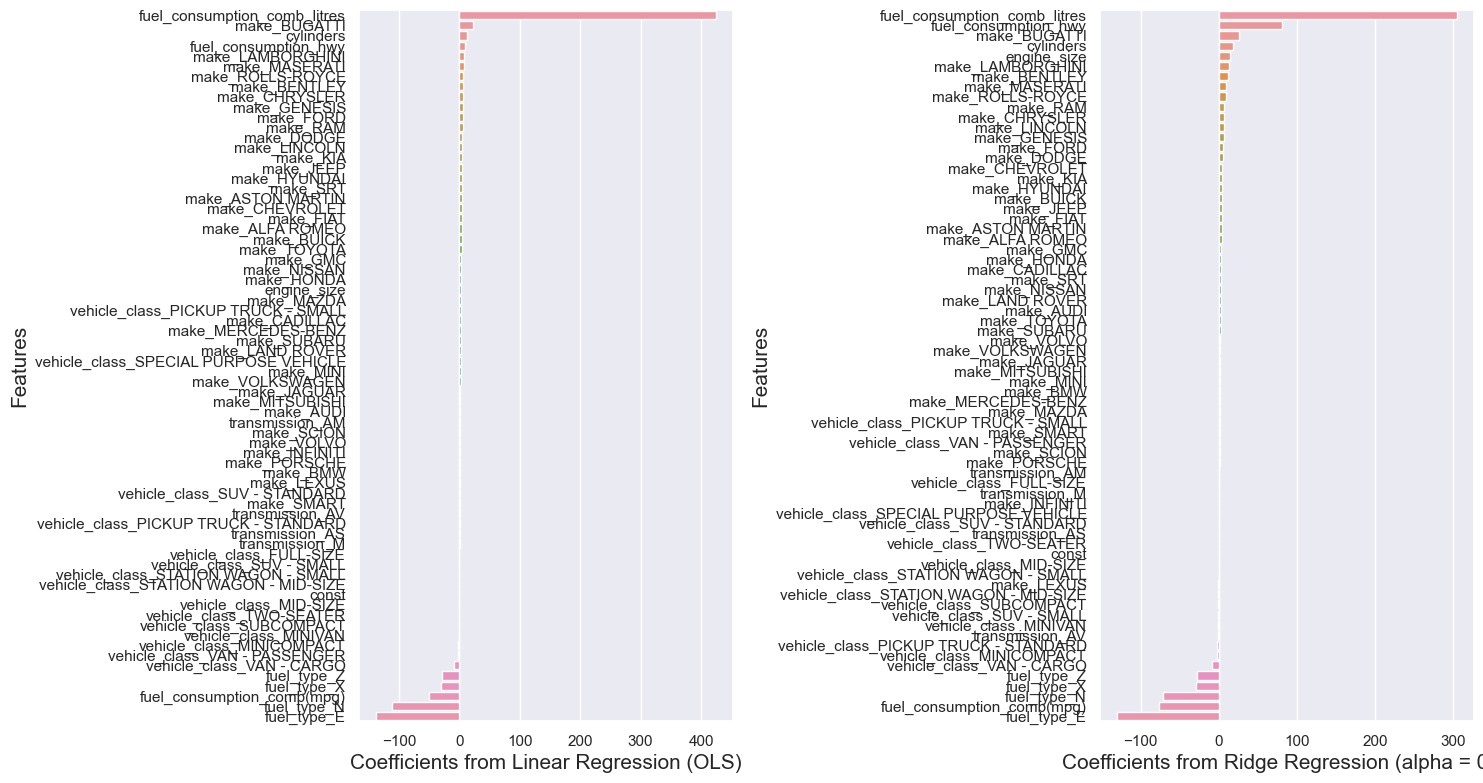

In [157]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(ridge, 'Ridge Regression (alpha = 0.5)')

plt.tight_layout()

The coefficients obtained from ridge regression have similar values as compared to the coefficients obtained from linear regression using OLS

# Lasso Regression Model

In [158]:
lasso = Lasso(alpha = 0.01, max_iter = 500)
lasso.fit(X_train, y_train)

print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 5.0594


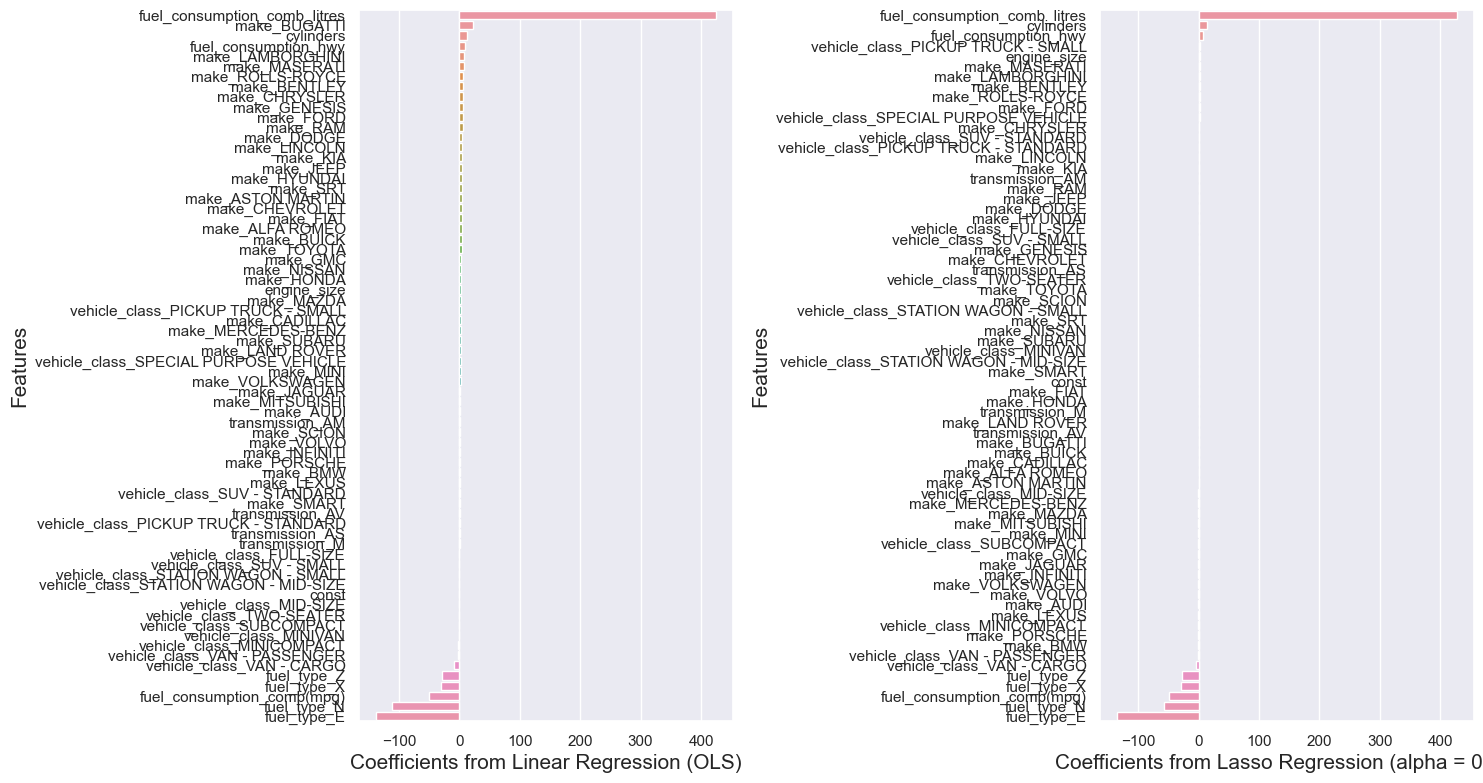

In [159]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(lasso, 'Lasso Regression (alpha = 0.01)')

plt.tight_layout()

In [160]:
lasso = Lasso(alpha = 0.05, max_iter = 500)
lasso.fit(X_train, y_train)

print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 5.3818


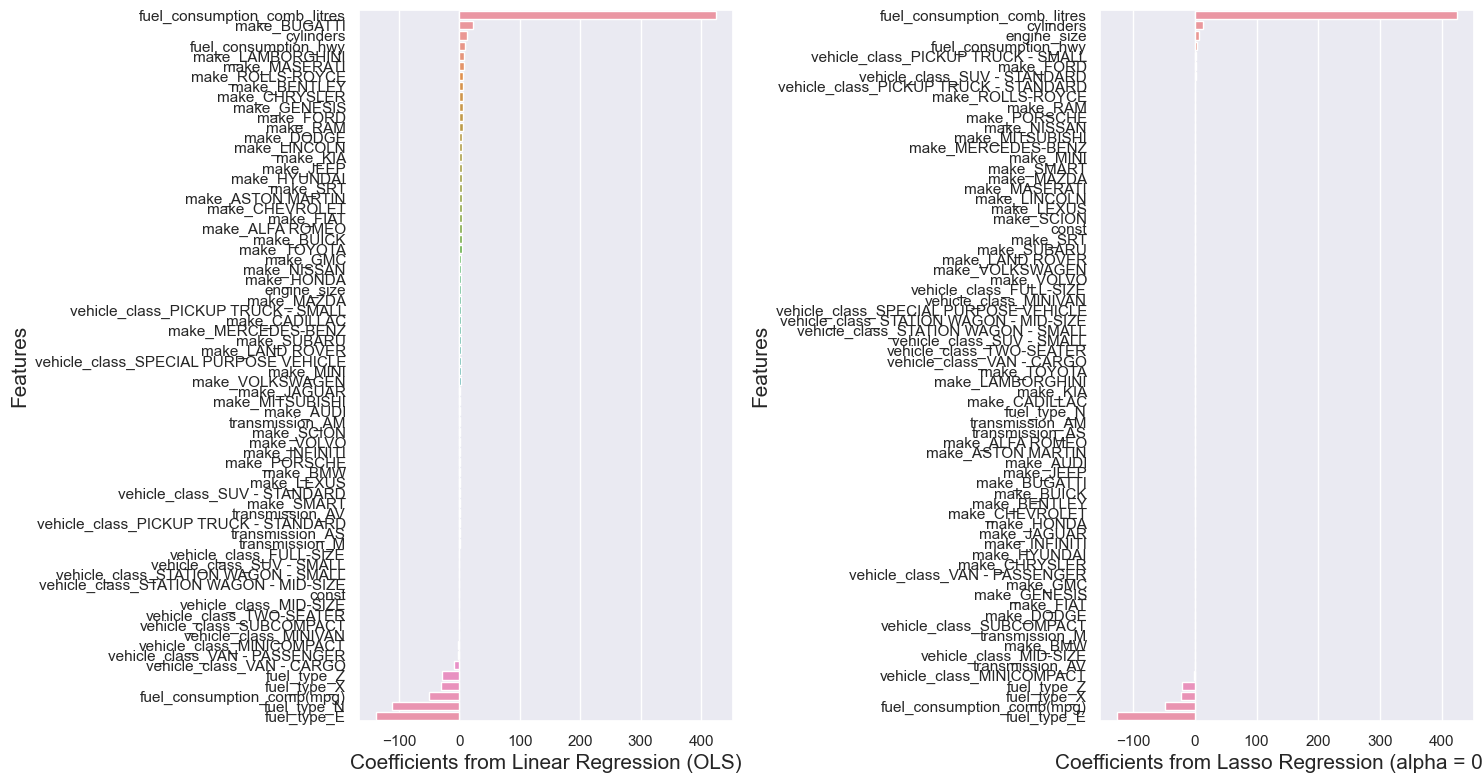

In [161]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(lasso, 'Lasso Regression (alpha = 0.05)')

plt.tight_layout()

The second subplot (on the right) shows that the lasso regression have reduced the coefficients of some variables to zero.

In [162]:
df_lasso_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': lasso.coef_})

print('Insignificant variables obtained from Lasso Regression when alpha is 0.05')
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list()

Insignificant variables obtained from Lasso Regression when alpha is 0.05


['const',
 'fuel_type_N',
 'transmission_AM',
 'transmission_AS',
 'make_ALFA ROMEO',
 'make_ASTON MARTIN',
 'make_AUDI',
 'make_BENTLEY',
 'make_BUGATTI',
 'make_BUICK',
 'make_CADILLAC',
 'make_CHEVROLET',
 'make_CHRYSLER',
 'make_DODGE',
 'make_FIAT',
 'make_GENESIS',
 'make_GMC',
 'make_HONDA',
 'make_HYUNDAI',
 'make_INFINITI',
 'make_JAGUAR',
 'make_JEEP',
 'make_KIA',
 'make_LAMBORGHINI',
 'make_LAND ROVER',
 'make_LEXUS',
 'make_LINCOLN',
 'make_MASERATI',
 'make_MAZDA',
 'make_MERCEDES-BENZ',
 'make_MINI',
 'make_MITSUBISHI',
 'make_NISSAN',
 'make_PORSCHE',
 'make_RAM',
 'make_ROLLS-ROYCE',
 'make_SCION',
 'make_SMART',
 'make_SRT',
 'make_SUBARU',
 'make_TOYOTA',
 'make_VOLKSWAGEN',
 'make_VOLVO',
 'vehicle_class_FULL-SIZE',
 'vehicle_class_MINIVAN',
 'vehicle_class_SPECIAL PURPOSE VEHICLE',
 'vehicle_class_STATION WAGON - MID-SIZE',
 'vehicle_class_STATION WAGON - SMALL',
 'vehicle_class_SUV - SMALL',
 'vehicle_class_TWO-SEATER',
 'vehicle_class_VAN - CARGO',
 'vehicle_clas

In [163]:
update_score_card(algorithm_name = 'Lasso Regression', model = lasso, alpha = '0.05')

In [164]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.55, max_iter = 500)
enet.fit(X_train, y_train)

update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.55')

print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 24.0641


In [165]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.1, max_iter = 500)
enet.fit(X_train, y_train)

update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.1')

print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 30.5569


In [166]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)
enet.fit(X_train, y_train)

update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')

print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 31.5004


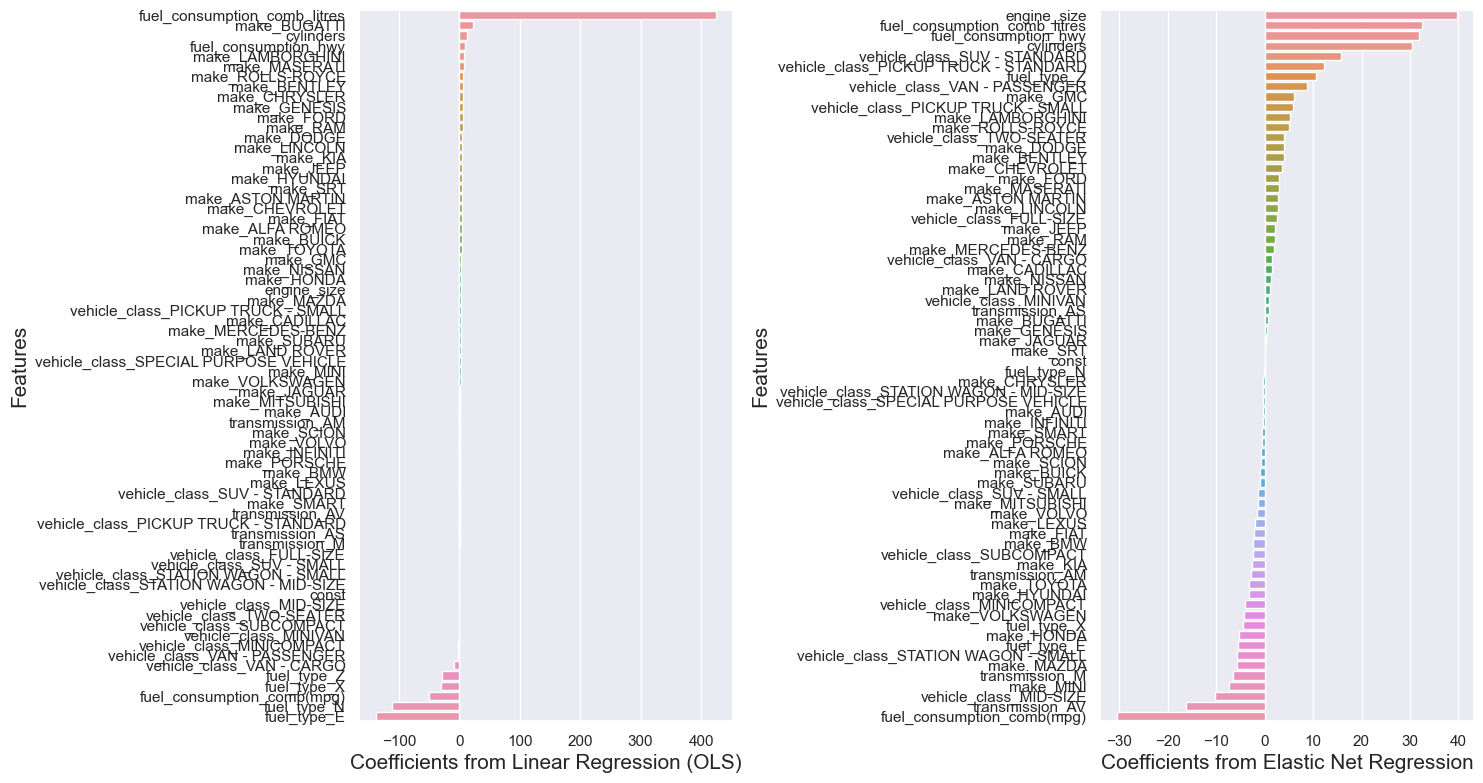

In [167]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(enet, 'Elastic Net Regression')

plt.tight_layout()

The second subplot (on the right) shows that the elastic-net regression has reduced the coefficients of some variables to zero

# Grid Search CV

In [168]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]

ridge = Ridge()
ridge_grid = GridSearchCV(estimator = ridge,
                          param_grid = tuned_paramaters,
                          cv = 10)

ridge_grid.fit(X_train, y_train)

print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')
print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 0.01} 

RMSE on test set: 4.9606


In [169]:
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)',
                  model = ridge_grid,
                  alpha = ridge_grid.best_params_.get('alpha'))

In [170]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]

lasso = Lasso()
lasso_grid = GridSearchCV(estimator = lasso,
                          param_grid = tuned_paramaters,
                          cv = 10)

lasso_grid.fit(X_train, y_train)

print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')
print('RMSE on test set:', get_test_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 1e-08} 

RMSE on test set: 4.9617


In [171]:
update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV)',
                  model = lasso_grid,
                  alpha = lasso_grid.best_params_.get('alpha'))

In [172]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2, 0.4, 0.55]}]

enet = ElasticNet()
enet_grid = GridSearchCV(estimator = enet,
                          param_grid = tuned_paramaters,
                          cv = 10)

enet_grid.fit(X_train, y_train)

print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')
print('RMSE on test set:', get_test_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.55} 

RMSE on test set: 5.0339


In [173]:
update_score_card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)',
                  model = enet_grid,
                  alpha = enet_grid.best_params_.get('alpha'),
                  l1_ratio = enet_grid.best_params_.get('l1_ratio'))

# Displaying score summary

In [174]:
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)
score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')


Lasso Regression using Grid search CV has been the most effective in reducing RMSE .

The exact combination of features responsible for high CO2 emissions cannot be predicted Since all the features are highly correlated.

We can hereby conclude that we have successfully built a model that can predict amount of CO2 Emissions across different vehicle types at a high accuracy rate.

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('clf.pkl','wb'))